## **Assignment: Predict House Prices using Linear Regression**

Use a dataset (for example, the **Boston Housing dataset** or **California Housing dataset** from `sklearn.datasets`) to build models that predict house prices.


## Tasks

### 1. Data Exploration & Cleaning
- Load the dataset and explore its structure.
- Handle missing or inconsistent values if present.
- Visualize key relationships between features and the target (price).


### 2. Feature Engineering
- Create meaningful features if needed (e.g., combining or transforming existing features).
- Encode categorical variables appropriately.
- Avoid including features that directly leak the target information.


### 3. Modeling & Training
- Train a **linear regression model** using scikit-learn.
- Optionally, experiment with **other regression algorithms** (Ridge, Lasso, or Gradient Boosting).


### 4. Evaluation
- Evaluate models using appropriate regression metrics:  
  - Mean Squared Error (MSE)  
  - Root Mean Squared Error (RMSE)  
  - Mean Absolute Error (MAE)  
  - R² score
- Visualize predictions versus true values.
- Discuss which features are most important for predicting price.


### 5. Reflection
Answer the following =:
- How well does the linear regression model perform?  
- Are there features that dominate the predictions?  
- Did scaling or feature engineering improve performance?  
- How would you handle non-linear relationships?


✅ Deliverables:
- A **Colab notebook** with:
  - Cleaned and explored dataset
  - Model training code
  - Plots and metrics for evaluation
  - Reflections and answers in Markdown


## 1. Data Exploration & Cleaning
Load the dataset and explore its structure.

Handle missing or inconsistent values if present.

Visualize key relationships between features and the target (price).

### Load the California Housing Dataset

In [321]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_california_housing

- Import the dataset from sklearn.datasets

In [322]:
housing = fetch_california_housing()
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


- Convert the dataset into a pandas DataFrame to view the columns

In [323]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [324]:
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

- Check what each column name means with the description of the dataset

In [325]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Explore the dataset structure

Visualise the numeric columns

In [326]:
# Numeric columns
print("Numeric Columns:")
df.describe()

Numeric Columns:


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

- All columns of the dataset are numeric columns

Visualize the distribution of numeric columns using histograms.

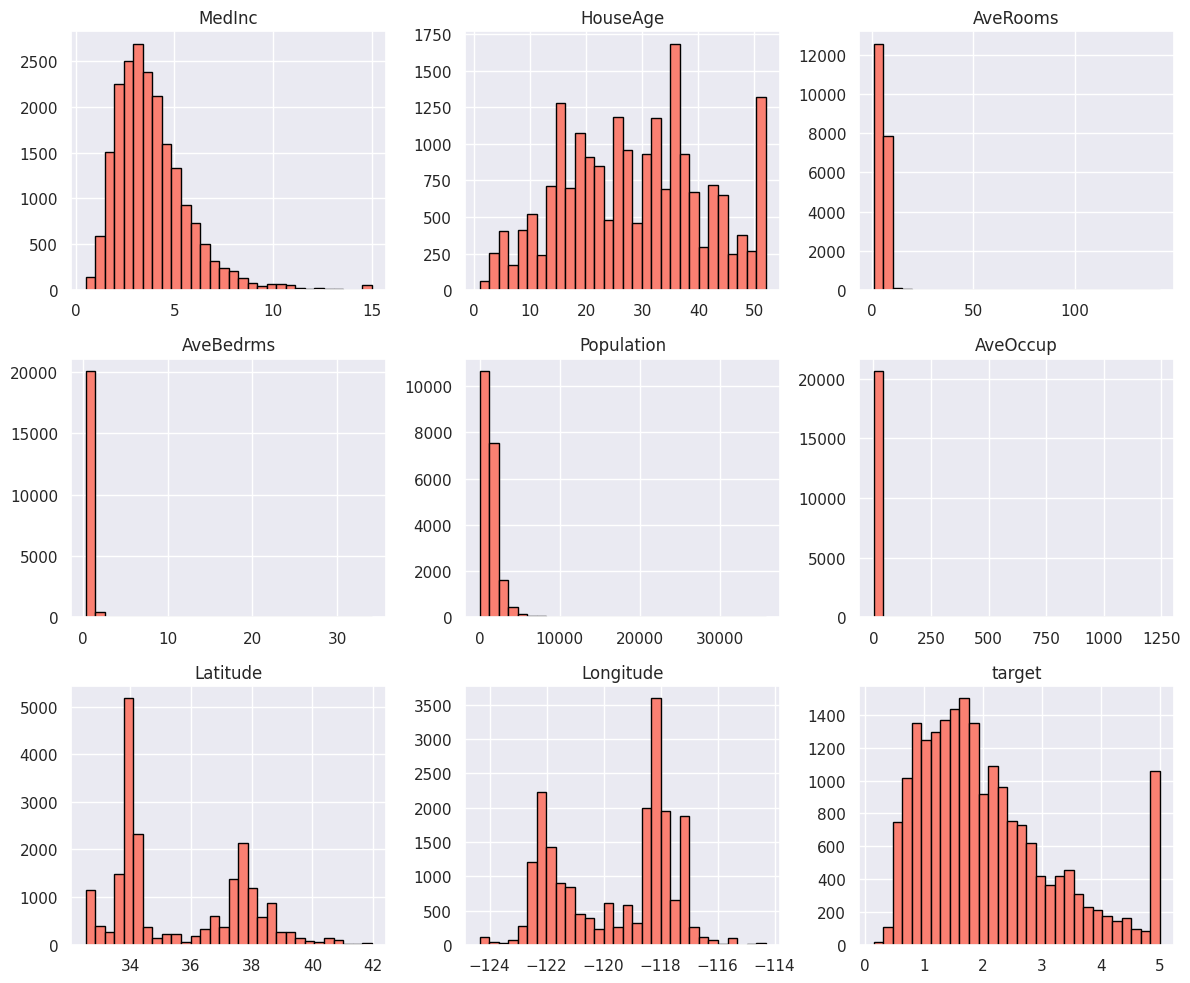

In [327]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black', color='salmon')
plt.tight_layout()
plt.show()

### Check for missing values

In [328]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

- There are no missing values in the dataset

### Check for inconsistent values and outliers

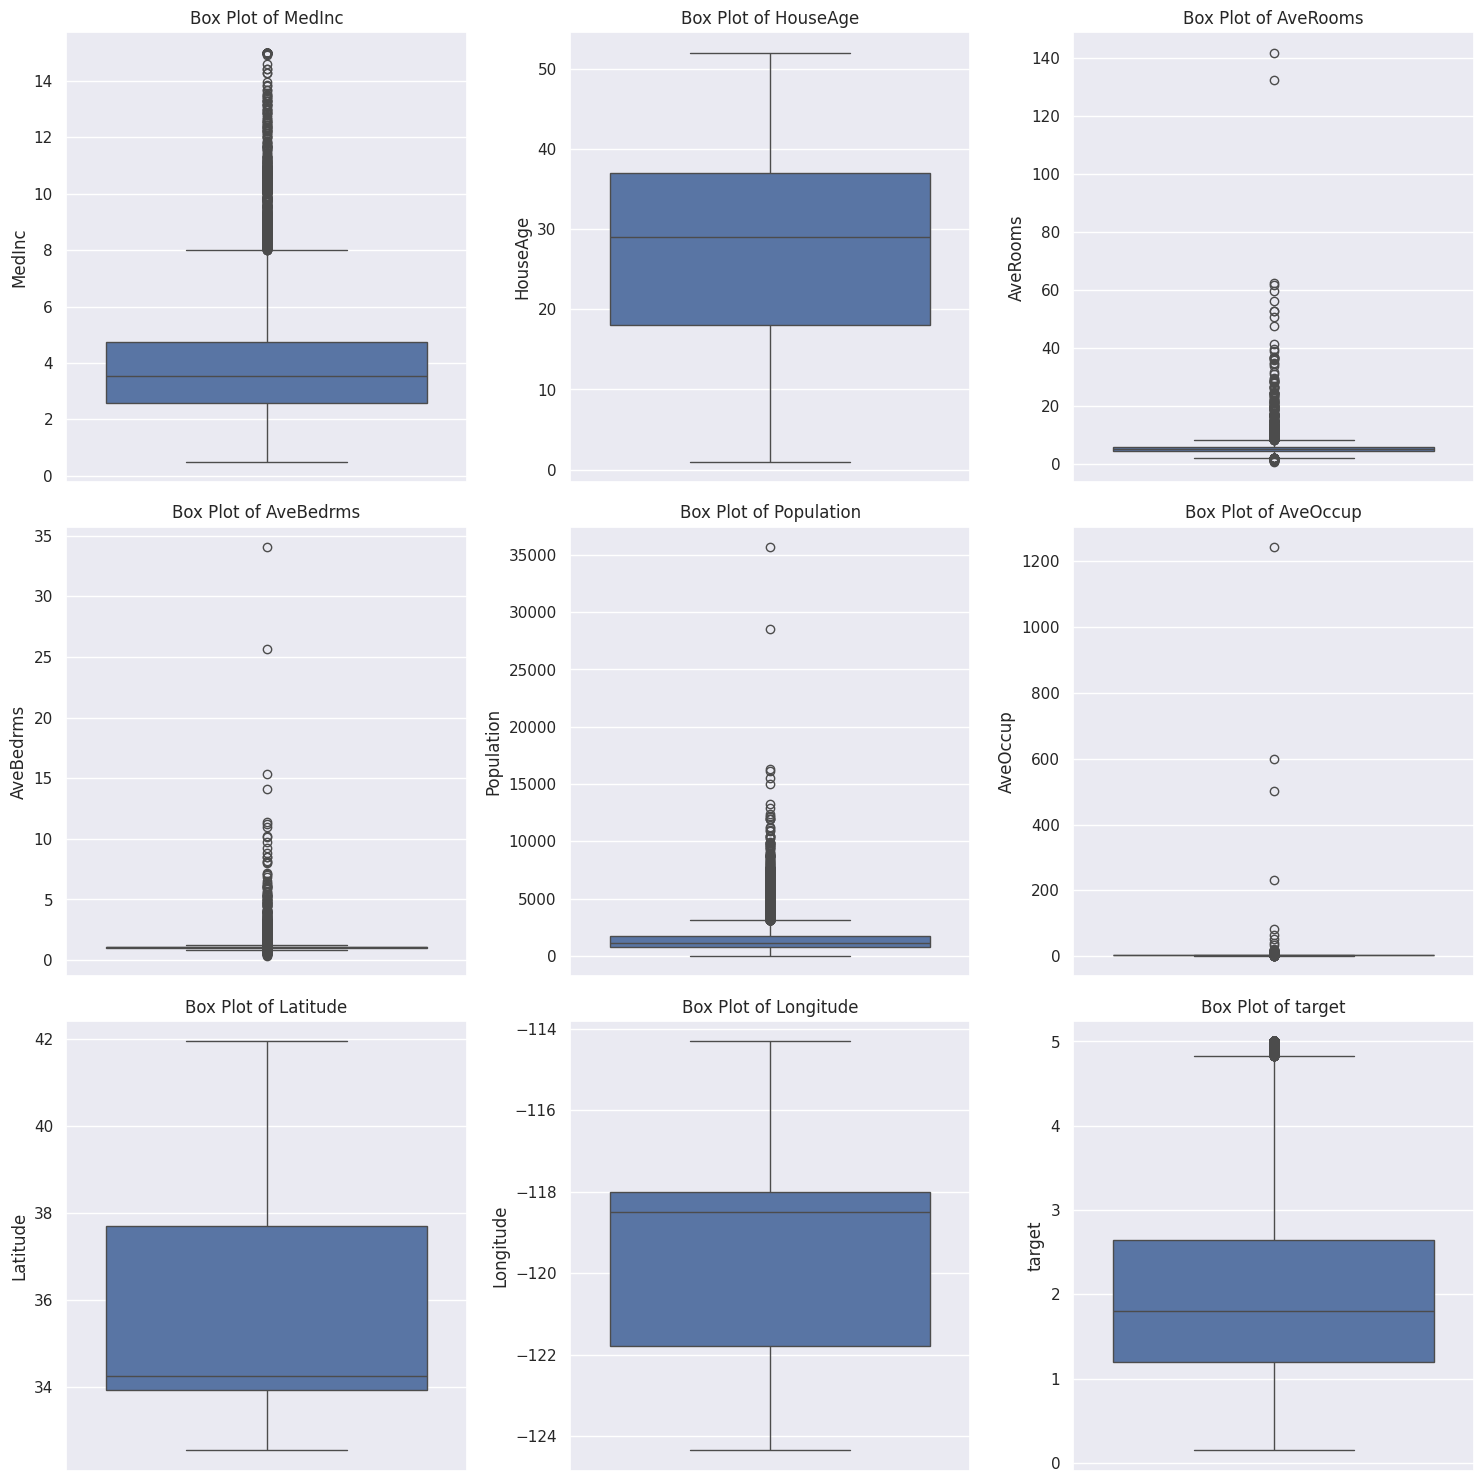

In [329]:
n_cols = 3
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

# Hide the subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- We do not see any unusual outliers in the box plots, so we leave the values as they are and scale them later

### Visualize key relationships between features and target

Use a heatmap to see the correlation between each feature and the target

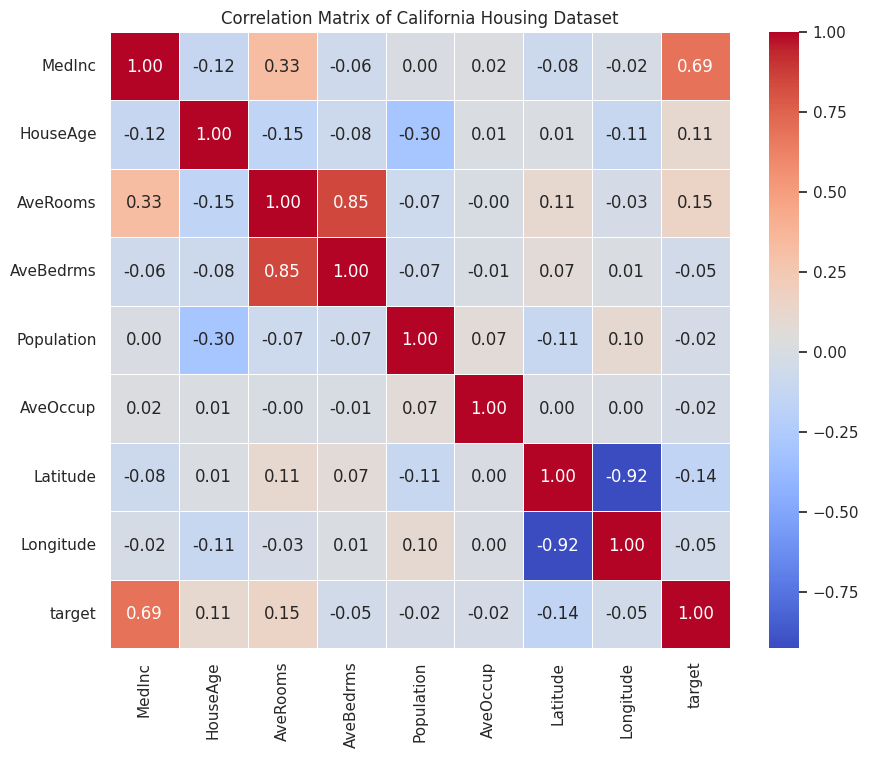

In [330]:
# Visualize relationships using a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of California Housing Dataset')
plt.show()

From the heatmap we see that:
- *MedInc* (Median Income) has the strongest positive correlation with the target (median house value) at 0.69. This indicates that as the median income increases, the median house value tends to increase as well.
- *HouseAge* has a weak positive correlation (0.11) with the target.
- *AveRooms* (Average Number of Rooms) has a weak positive correlation (0.15) with the target.
- *AveBedrms* (Average Number of Bedrooms) has a very weak negative correlation (-0.05) with the target.
- *Population* has a very weak negative correlation (-0.02) with the target.
- *AveOccup* (Average Number of Household Members) has a very weak negative correlation (-0.02) with the target.
- *Latitude* has a weak negative correlation (-0.14) with the target.
- *Longitude* has a weak negative correlation (-0.05) with the target.

*MedInc* appears to be the most influential feature in predicting the target variable based on this linear correlation analysis.


## 2. Feature Engineering
- Create meaningful features if needed (e.g., combining or transforming existing features).
- Encode categorical variables appropriately.
- Avoid including features that directly leak the target information.



### Create new features 'Rooms_per_person', 'Bedrms_per_room' and 'Population_per_household'


Create new features based on existing ones and display the first few rows of the updated DataFrame.



We will create these features:
- **Rooms_per_person** based on *AveRooms* and *AveOccup*
- **Bedrooms_per_room** based on the number of *AveBedrms* and *AveRooms*
- **Population_per_household** based on *Population* and *AveOccup*


In [331]:
df['Rooms_per_person'] = df['AveRooms'] / df['AveOccup']
df['Bedrms_per_room'] = df['AveBedrms'] / df['AveRooms']
df['Population_per_household'] = df['Population'] / df['AveOccup']

df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Rooms_per_person  Bedrms_per_room  \
0    -122.23   4.526          2.732919         0.146591   
1    -122.22   3.585          2.956685         0.155797   
2    -122.24   3.521          2.957661         0.129516   
3    -122.25   3.413          2.283154         0.184458   
4    -122.25   3.422          2.879646         0.172096   

   Population_per_household  
0                     126.0  
1                    1138.0  
2                     177.0  
3                     219.0  
4                     259.0

- We created successfully the new features


Make a correlation matrix to see the relationship between the three new features and the target.

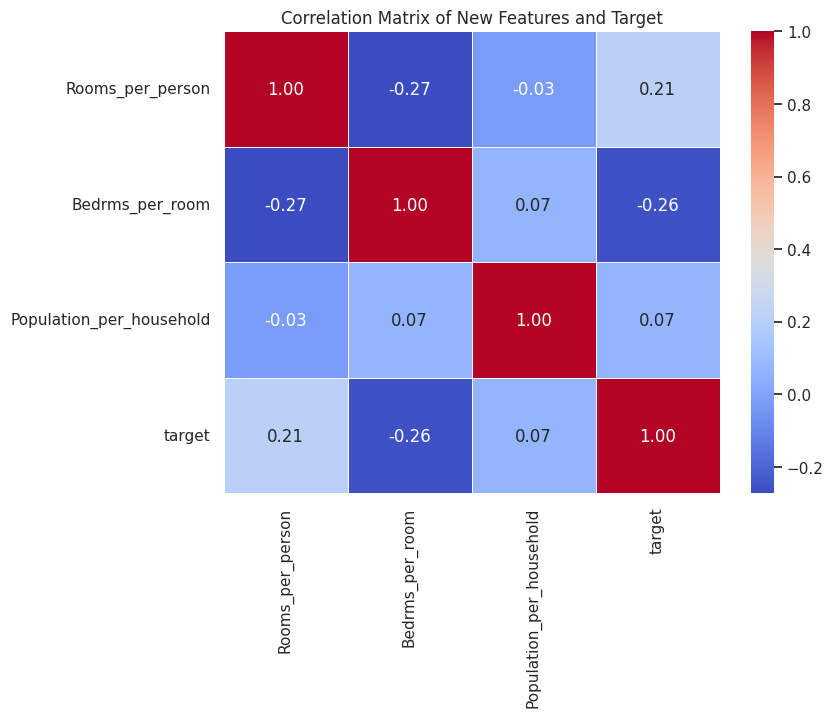

In [332]:
# Select the new features and the target
new_features_and_target = df[['Rooms_per_person', 'Bedrms_per_room', 'Population_per_household','target']]

# Calculate the correlation matrix
correlation_matrix_new = new_features_and_target.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of New Features and Target')
plt.show()

From the heatmap we can see:
- There is a slightly weak negative correlation between **Bedrms_per_room** and the target
- There is a slightly weak positive correlation between **Rooms_per_person** and the target
- There is a very weak positive correlation between **Population_per_houshold** and the target


### Create new feature 'Neighborhood_Cluster' based on *Latitude* and *Longitude*

We want to see the distribution of prices based on location coordinates and population

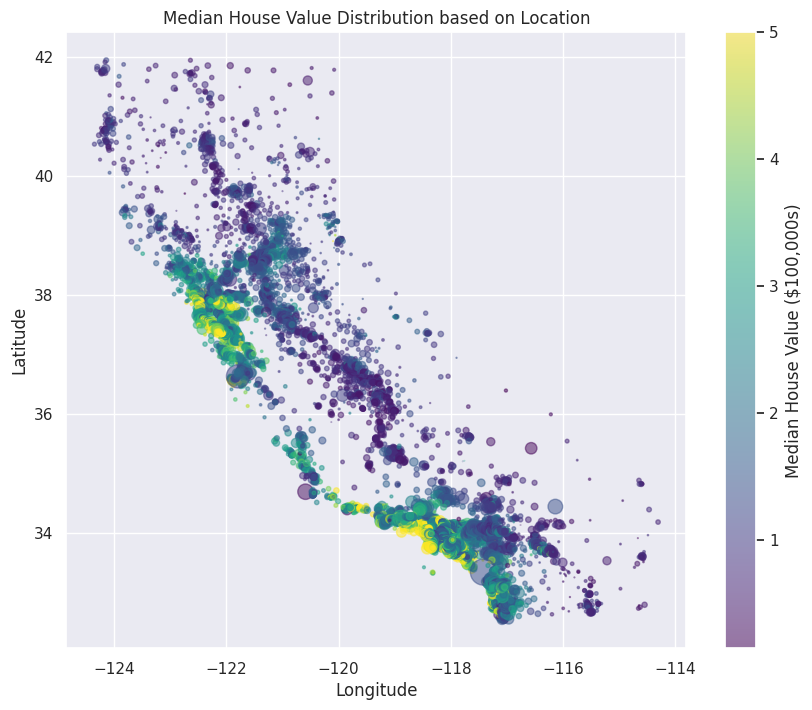

In [333]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['target'], cmap='viridis', alpha=0.5, s=df['Population']/100)
plt.colorbar(scatter, label='Median House Value ($100,000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median House Value Distribution based on Location')
plt.grid(True)
plt.show()

This plot looks like a mini-map of California, where we can observe several patterns related to house prices:

- There is a concentration of higher-priced areas along the coast. This suggests that being closer to the coast generally correlates with higher median house values.
- Inland areas tend to have lower median house values compared to coastal regions.
- There appear to be distinct regions with different price ranges.
- The size of the points represents population, but it doesn't seem to have as strong and clear a visual correlation with price as the location itself.

Because the prices of houses varys a lot based on their location, we want to create something similar to Neighborhoods by combining the location coordinates *Latitude* and *Longitude*.

- We will use the KMeans library and try to create as many clusters as necessary, but also not too many so they will be strongly correlated
- First, we want to see which number of clusters would result the best correlation coefficient with the target

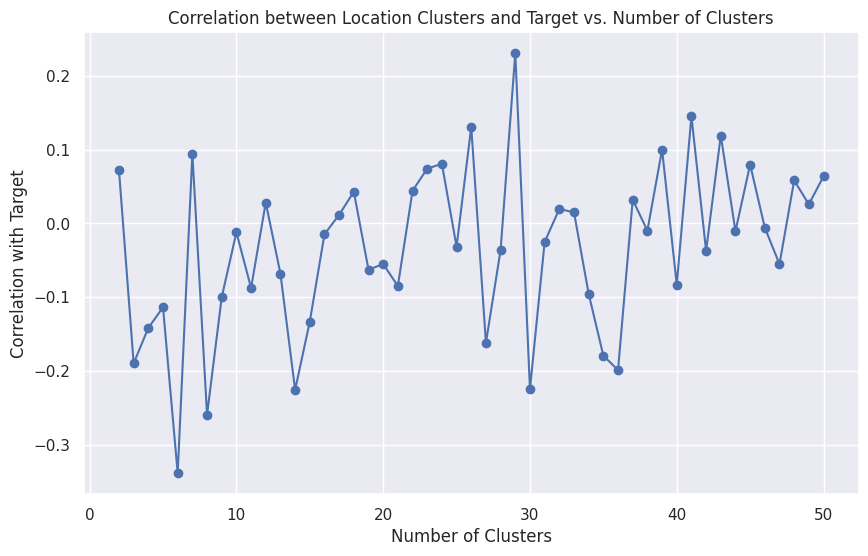

Number of clusters with the strongest correlation: 6
Strongest correlation coefficient: -0.3384


In [334]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select Latitude and Longitude for clustering
location_data = df[['Latitude', 'Longitude']]

# Define a range of cluster numbers to try
cluster_range = range(2, 51) # try from 2 to 50 clusters

# List to store correlation coefficients
correlations = []

# Calculate correlation for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Neighborhood_Cluster'] = kmeans.fit_predict(location_data)

    # Calculate the correlation between the new cluster feature and the target
    correlation = df['Neighborhood_Cluster'].corr(df['target'])
    correlations.append(correlation)

# Plot the correlation vs. the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, correlations, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Correlation with Target')
plt.title('Correlation between Location Clusters and Target vs. Number of Clusters')
plt.grid(True)
plt.show()

# Find the number of clusters with the strongest correlation (absolute value)
abs_correlations = [abs(c) for c in correlations]
best_n_clusters_index = abs_correlations.index(max(abs_correlations))
best_n_clusters = cluster_range[best_n_clusters_index]
best_correlation = correlations[best_n_clusters_index]

print(f"Number of clusters with the strongest correlation: {best_n_clusters}")
print(f"Strongest correlation coefficient: {best_correlation:.4f}")

- We see from the plot that the strongest correlation with the target (-0.3384) is given by 6 clusters, so we will use 6 as the number of clusters to create

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Rooms_per_person  Bedrms_per_room  \
0    -122.23   4.526          2.732919         0.146591   
1    -122.22   3.585          2.956685         0.155797   
2    -122.24   3.521          2.957661         0.129516   
3    -122.25   3.413          2.283154         0.184458   
4    -122.25   3.422          2.879646         0.172096   

   Population_per_household  Neighborhood_Cluster  
0                     126.0                     1  
1                    1138.0                     1  
2                     177.0                     1  
3                     219.0                     1  
4                     259.0                     1

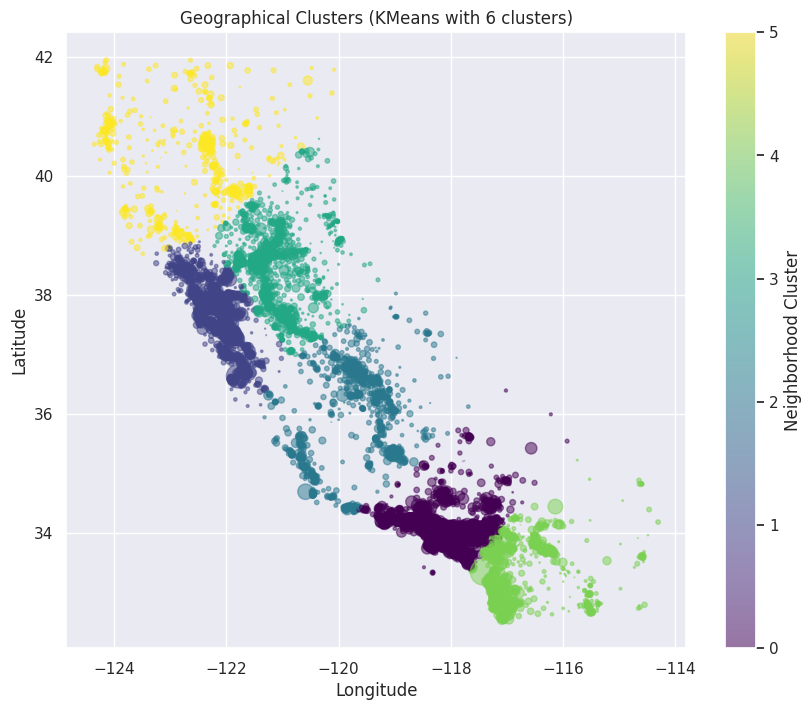

In [335]:
from sklearn.cluster import KMeans

# Select Latitude and Longitude for clustering
location_data = df[['Latitude', 'Longitude']]

# Initialize KMeans
# Choose a number of clusters - 6
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for KMeans

# Fit KMeans to the location data and get cluster labels
df['Neighborhood_Cluster'] = kmeans.fit_predict(location_data)

# Display the first few rows with the new 'Neighborhood_Cluster' column
display(df.head())

# Visualize the clusters on the map
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Neighborhood_Cluster'], cmap='viridis', alpha=0.5, s=df['Population']/100)
plt.colorbar(scatter, label='Neighborhood Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Geographical Clusters (KMeans with {n_clusters} clusters)')
plt.grid(True)
plt.show()

Plot the correlation matrix between this new feature and the target

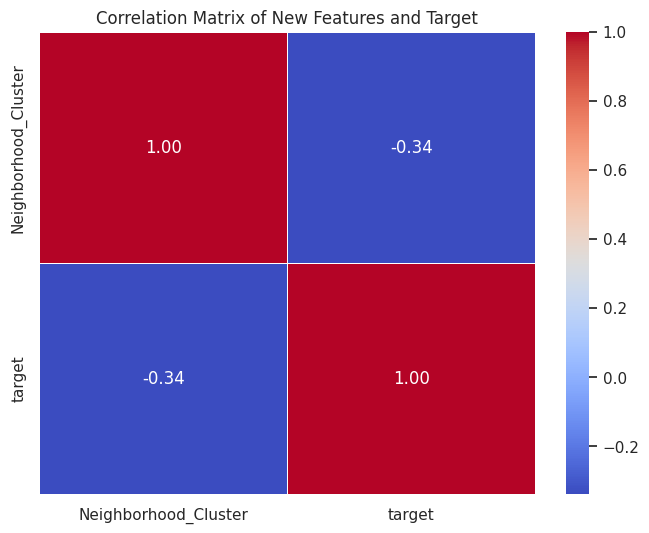

In [336]:
# Select the new features and the target
new_features_and_target = df[['Neighborhood_Cluster', 'target']]

# Calculate the correlation matrix
correlation_matrix_new = new_features_and_target.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of New Features and Target')
plt.show()

- We observe a good negative correlation between *Neighborhood_Cluster* and the target

### Create new features from the json file created with *geopy*


First we want to see the distribution of california counties

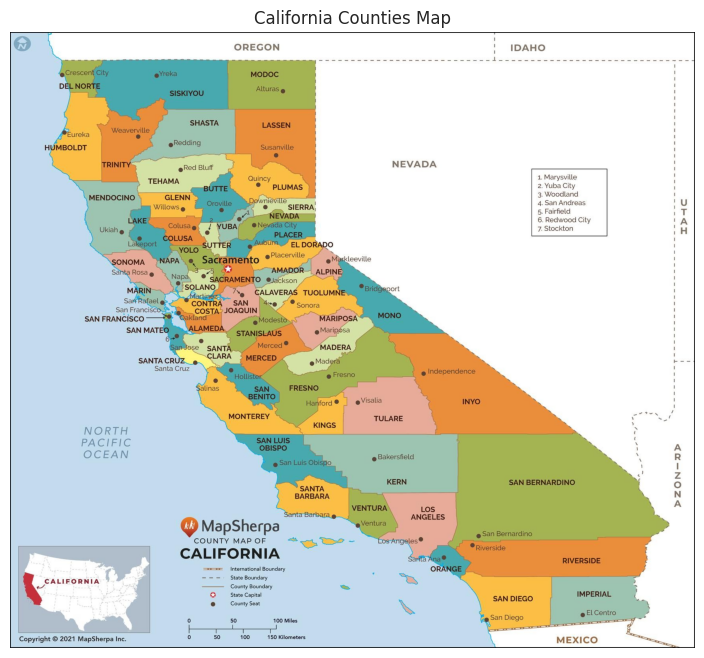

In [337]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the uploaded image
image_path = '/content/california-counties-map-standard.jpg'

# Read the image
img = mpimg.imread(image_path)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off') # Hide axes
plt.title('California Counties Map')
plt.show()

From our json file, we want to create a map that display the california cities. Based on the processed latitude and longitude (using geopy) we created a json file that holds detailed data about each city.

In [338]:
import json

file_path = '/content/california_city_cache.json'

with open(file_path, 'r') as f:
    city_data = json.load(f)

# Display the loaded data to understand its structure
print(json.dumps(city_data, indent=2))

{
  "37.88,-122.23": {
    "leisure": "Ecological Study Area",
    "road": "Summit Road",
    "neighbourhood": "La Loma Park",
    "city": "Berkeley",
    "county": "Alameda County",
    "state": "California",
    "ISO3166-2-lvl4": "US-CA",
    "postcode": "94720",
    "country": "United States",
    "country_code": "us"
  },
  "37.86,-122.22": {
    "leisure": "Grizzly Peak Open Space",
    "road": "Grizzly Terrace Drive",
    "city": "Oakland",
    "county": "Alameda County",
    "state": "California",
    "ISO3166-2-lvl4": "US-CA",
    "postcode": "94563",
    "country": "United States",
    "country_code": "us"
  },
  "37.85,-122.24": {
    "road": "Grove Shafter Freeway",
    "neighbourhood": "Upper Rockridge",
    "city": "Oakland",
    "county": "Alameda County",
    "state": "California",
    "ISO3166-2-lvl4": "US-CA",
    "postcode": "94618",
    "country": "United States",
    "country_code": "us"
  },
  "37.84,-122.26": {
    "club": "Colombo Club",
    "road": "Claremont Av

#### Extract City Information

In [339]:
# Extract latitude, longitude, and city name from the JSON data
city_list = []
for location, data in city_data.items():
    latitude, longitude = map(float, location.split(','))
    city = data.get('city', data.get('town', data.get('village'))) # Handle cases where 'city' might not be present
    if city: # Only include entries with a city name
        city_list.append({'Latitude': latitude, 'Longitude': longitude, 'City': city})

# Convert the list of dictionaries to a pandas DataFrame
cities_df = pd.DataFrame(city_list)

display(cities_df.head())

Latitude  Longitude      City
0     37.88    -122.23  Berkeley
1     37.86    -122.22   Oakland
2     37.85    -122.24   Oakland
3     37.84    -122.26   Oakland
4     37.85    -122.28  Berkeley

We will use the 'City' column to define the city groups. To visualize these groups with different colors, we will count the number of unique cities and prepare the data for plotting.

In [340]:
# Get the number of unique cities
num_unique_cities = cities_df['City'].nunique()
print(f"Number of unique cities: {num_unique_cities}")

# Check the most frequent cities
print("\nMost frequent cities:")
display(cities_df['City'].value_counts().head())

# For visualization, we can use a categorical color mapping based on the 'City' column
# We will select a subset of the most frequent cities for clearer visualization if there are too many
top_n_cities = 50 # You can adjust this number
top_cities = cities_df['City'].value_counts().nlargest(top_n_cities).index.tolist()

# Filter the DataFrame to include only the top cities for visualization
cities_df_filtered = cities_df[cities_df['City'].isin(top_cities)].copy()

display(cities_df_filtered.head())

Number of unique cities: 741

Most frequent cities:


City
Los Angeles    213
San Diego      102
San Jose        66
Fresno          54
Sacramento      41
Name: count, dtype: int64

Latitude  Longitude     City
1     37.86    -122.22  Oakland
2     37.85    -122.24  Oakland
3     37.84    -122.26  Oakland
6     37.82    -122.26  Oakland
7     37.81    -122.29  Oakland

#### Visualize City Groups

We will create a scatter plot of the cities, colored by their respective city groups (for the top 50 cities).

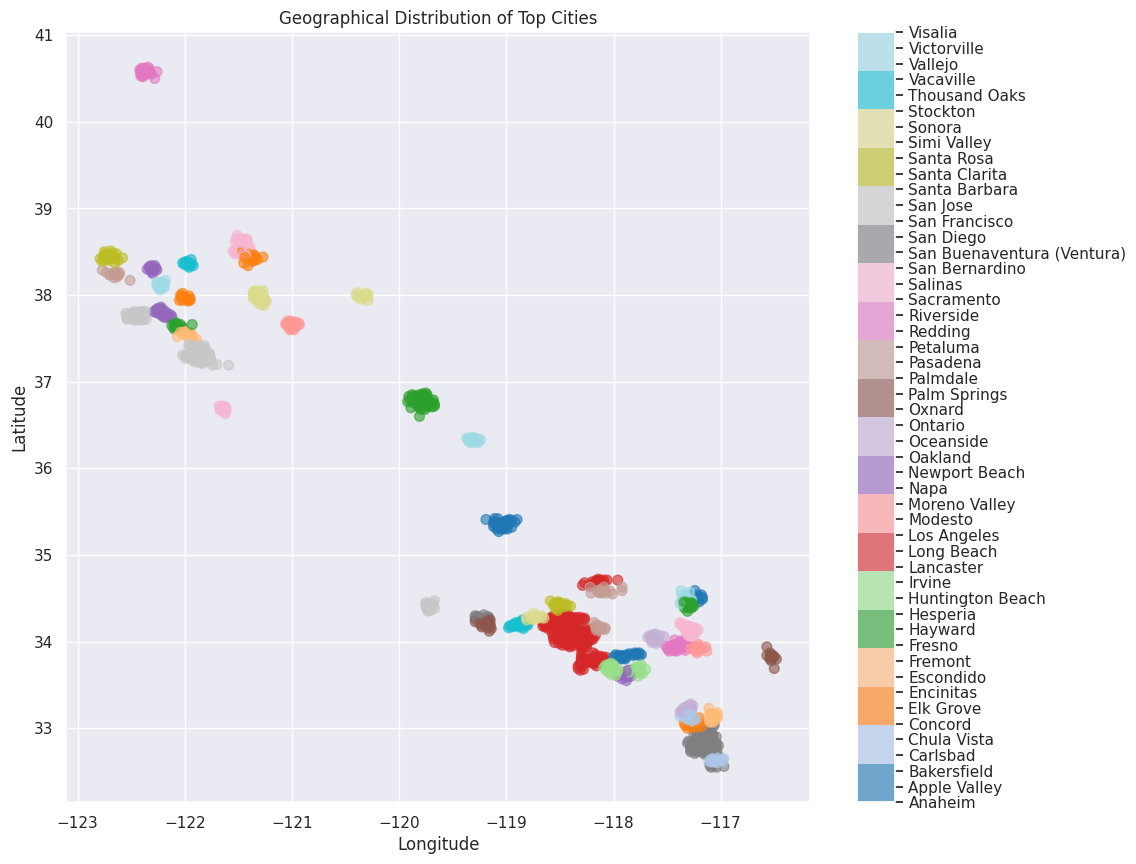

In [341]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(cities_df_filtered['Longitude'], cities_df_filtered['Latitude'],
                      c=cities_df_filtered['City'].astype('category').cat.codes,
                      cmap='tab20', alpha=0.6, s=50) # s is marker size

# Create a colorbar with city names as labels (for the top cities shown)
# Get unique cities in the filtered DataFrame and their corresponding color codes
unique_cities_filtered = cities_df_filtered['City'].unique()
color_codes = cities_df_filtered['City'].astype('category').cat.codes.unique()

# Create a mapping from color code to city name
color_code_to_city = {code: city for code, city in zip(color_codes, unique_cities_filtered)}

# Sort the color codes to match the colorbar ticks
sorted_color_codes = sorted(color_code_to_city.keys())
colorbar_labels = [color_code_to_city[code] for code in sorted_color_codes]

# Create the colorbar with custom ticks and labels
cbar = plt.colorbar(scatter, ticks=sorted_color_codes)
cbar.ax.set_yticklabels(colorbar_labels)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Top Cities')
plt.grid(True)
plt.show()

Visualize the top 50 cities compared to the other cities

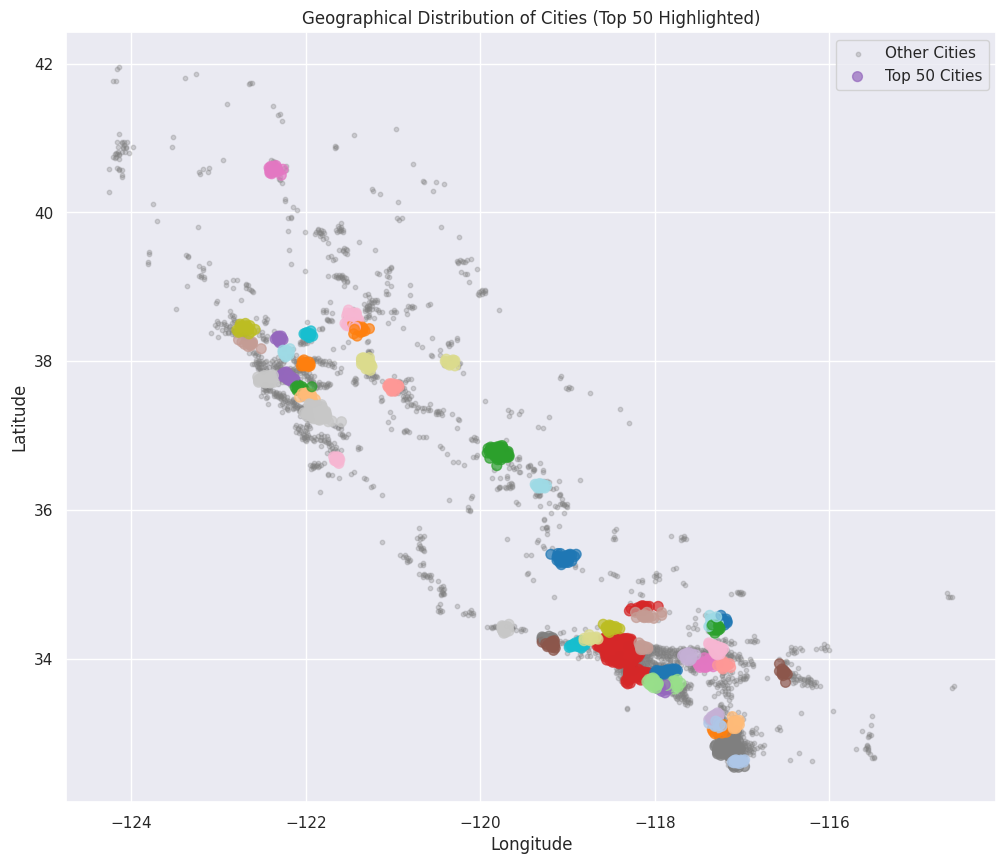

In [342]:
plt.figure(figsize=(12, 10))

# Create a new column to differentiate top cities for coloring and sizing
cities_df['is_top_city'] = cities_df['City'].apply(lambda x: x in top_cities)

# Separate the DataFrame into top cities and other cities
df_top_cities = cities_df[cities_df['is_top_city']].copy()
df_other_cities = cities_df[~cities_df['is_top_city']].copy()

# Plot other cities first (in gray and smaller)
plt.scatter(df_other_cities['Longitude'], df_other_cities['Latitude'],
            color='gray', alpha=0.3, s=10, label='Other Cities')

# Plot top cities (with distinct colors and larger size)
# Use a categorical color mapping for the top cities
scatter_top = plt.scatter(df_top_cities['Longitude'], df_top_cities['Latitude'],
                          c=df_top_cities['City'].astype('category').cat.codes,
                          cmap='tab20', alpha=0.7, s=50, label='Top 50 Cities') # Increased marker size

# Add a legend for the two groups
plt.legend()

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Cities (Top 50 Highlighted)') # Updated title
plt.grid(True)
plt.show()

# Drop the temporary 'is_top_city' column if no longer needed
cities_df = cities_df.drop('is_top_city', axis=1)

Visualize the distribution of all cities

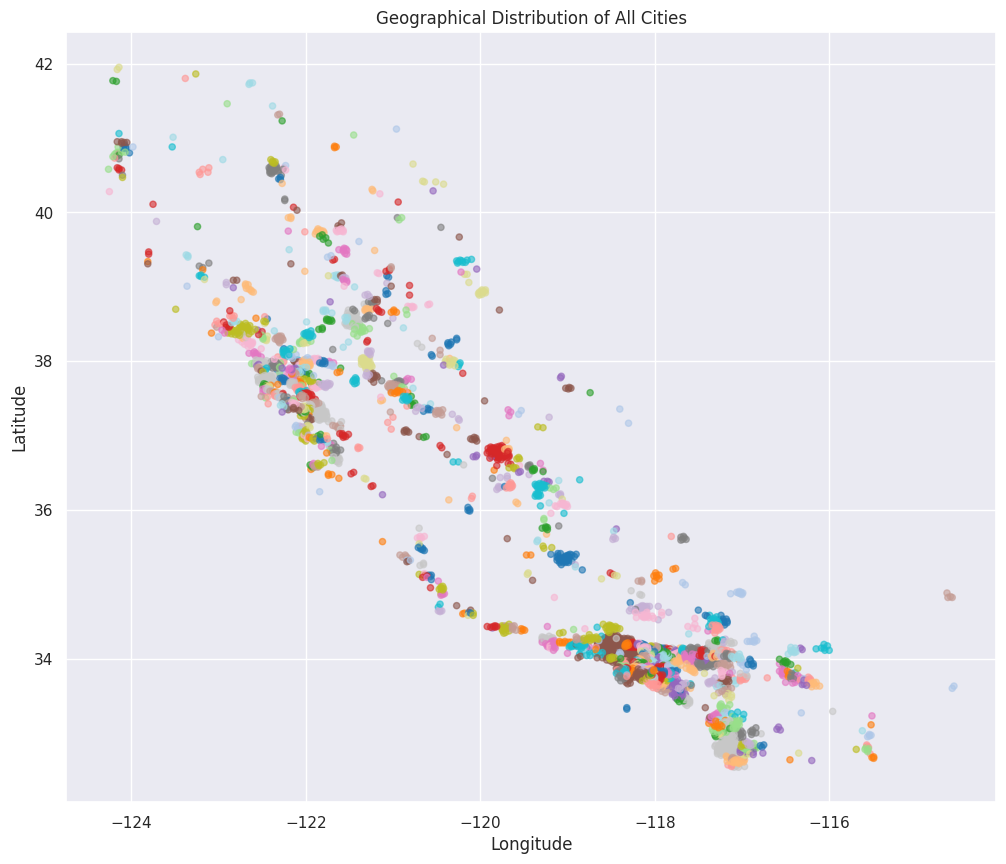

In [343]:
plt.figure(figsize=(12, 10))

# Use the full cities_df DataFrame for plotting
scatter = plt.scatter(cities_df['Longitude'], cities_df['Latitude'],
                      c=cities_df['City'].astype('category').cat.codes,
                      cmap='tab20', alpha=0.6, s=20) # Reduced marker size for more points

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of All Cities') # Updated title
plt.grid(True)
plt.show()

# Note: If you previously added a 'is_top_city' column for highlighting, you might want to drop it here
if 'is_top_city' in cities_df.columns:
    cities_df = cities_df.drop('is_top_city', axis=1)

#### Extract County Information

In [344]:
# Extract latitude, longitude, and county name from the JSON data
county_list = []
for location, data in city_data.items():
    latitude, longitude = map(float, location.split(','))
    county = data.get('county')
    if county: # Only include entries with a county name
        county_list.append({'Latitude': latitude, 'Longitude': longitude, 'County': county})

# Convert the list of dictionaries to a pandas DataFrame
counties_df = pd.DataFrame(county_list)

display(counties_df.head())

Latitude  Longitude          County
0     37.88    -122.23  Alameda County
1     37.86    -122.22  Alameda County
2     37.85    -122.24  Alameda County
3     37.84    -122.26  Alameda County
4     37.85    -122.28  Alameda County

In [345]:
# Get the number of unique counties
num_unique_counties = counties_df['County'].nunique()
print(f"Number of unique counties: {num_unique_counties}")


Number of unique counties: 58


#### Visualize Counties

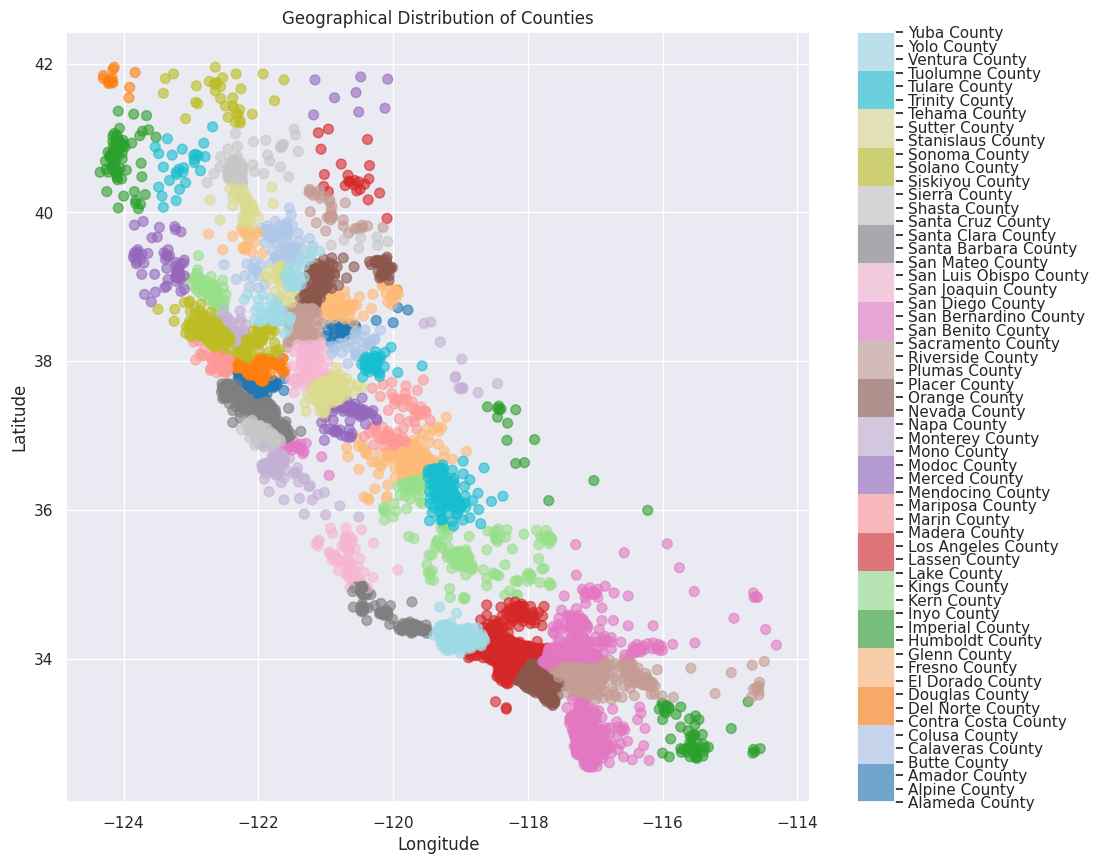

In [346]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(counties_df['Longitude'], counties_df['Latitude'],
                      c=counties_df['County'].astype('category').cat.codes,
                      cmap='tab20', alpha=0.6, s=50) # s is marker size

# Get unique cities in the filtered DataFrame and their corresponding color codes
county_list = counties_df['County'].unique()
color_codes = counties_df['County'].astype('category').cat.codes.unique()

# Create a mapping from color code to county name
color_code_to_county = {code: county for code, county in zip(color_codes, county_list)}

# Sort the color codes to match the colorbar ticks
sorted_color_codes = sorted(color_code_to_county.keys())
colorbar_labels = [color_code_to_county[code] for code in sorted_color_codes]

# Create the colorbar with custom ticks and labels
cbar = plt.colorbar(scatter, ticks=sorted_color_codes)
cbar.ax.set_yticklabels(colorbar_labels)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Counties')
plt.grid(True)
plt.show()

#### Add the new features 'City' and 'County' to the dataframe

Add the 'County' and 'City' features to the dataframe

In [347]:
# Merge the counties_df with the main df
df = pd.merge(df, counties_df, on=['Latitude', 'Longitude'], how='left')

# Merge the cities_df with the main df
df = pd.merge(df, cities_df, on=['Latitude', 'Longitude'], how='left')

display(df.head())

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Rooms_per_person  Bedrms_per_room  \
0    -122.23   4.526          2.732919         0.146591   
1    -122.22   3.585          2.956685         0.155797   
2    -122.24   3.521          2.957661         0.129516   
3    -122.25   3.413          2.283154         0.184458   
4    -122.25   3.422          2.879646         0.172096   

   Population_per_household  Neighborhood_Cluster          County      City  
0                     126.0                     1  Alameda County  Berkeley  
1                    1138.0                     1  Alameda County   Oakland  
2                     177.0                     1  Alameda County   Oakland  
3                     219.0                     1             NaN       NaN  
4                     259.0                     1             NaN       NaN

Check for missing values in *City* and *County*

In [348]:
df.isna().sum()

MedInc                          0
HouseAge                        0
AveRooms                        0
AveBedrms                       0
Population                      0
AveOccup                        0
Latitude                        0
Longitude                       0
target                          0
Rooms_per_person                0
Bedrms_per_room                 0
Population_per_household        0
Neighborhood_Cluster            0
County                      13597
City                        15499
dtype: int64

Fill the missing values of *City* and *County* with "Unknown"

In [349]:
df['City'] = df['City'].fillna('Unknown')
df['County'] = df['County'].fillna('Unknown')

df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Rooms_per_person  Bedrms_per_room  \
0    -122.23   4.526          2.732919         0.146591   
1    -122.22   3.585          2.956685         0.155797   
2    -122.24   3.521          2.957661         0.129516   
3    -122.25   3.413          2.283154         0.184458   
4    -122.25   3.422          2.879646         0.172096   

   Population_per_household  Neighborhood_Cluster          County      City  
0                     126.0                     1  Alameda County  Berkeley  
1                    1138.0                     1  Alameda County   Oakland  
2                     177.0                     1  Alameda County   Oakland  
3                     219.0                     1         Unknown   Unknown  
4                     259.0                     1         Unknown   Unknown

We will encode the categorical columns *City* and *County* using **Frequency Encoding**. Using Label Encoding wouldn't work because the Cities and Counties don't have an inherent order and using One-Hot Encoding would create a very big dataframe because we have a lot of cities and counties.

In [350]:
df_freq = df.copy()

# Frequency encoding
df_freq['City'] = df_freq['City'].map(df_freq['City'].value_counts())
df_freq['County'] = df_freq['County'].map(df_freq['County'].value_counts())

df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Rooms_per_person  Bedrms_per_room  \
0    -122.23   4.526          2.732919         0.146591   
1    -122.22   3.585          2.956685         0.155797   
2    -122.24   3.521          2.957661         0.129516   
3    -122.25   3.413          2.283154         0.184458   
4    -122.25   3.422          2.879646         0.172096   

   Population_per_household  Neighborhood_Cluster          County      City  
0                     126.0                     1  Alameda County  Berkeley  
1                    1138.0                     1  Alameda County   Oakland  
2                     177.0                     1  Alameda County   Oakland  
3                     219.0                     1         Unknown   Unknown  
4                     259.0                     1         Unknown   Unknown

See the correlation matrix of the new features *City* and *County* with the target

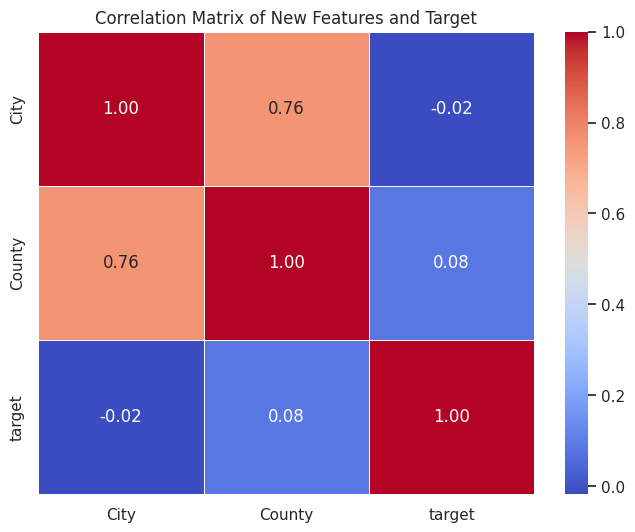

In [351]:
# Select the new features and the target
new_features_and_target = df_freq[['City', 'County','target']]

# Calculate the correlation matrix
correlation_matrix_new = new_features_and_target.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of New Features and Target')
plt.show()

- It appears that these features contribute very little to the prediction of the target

#### Compute the 'Ocean_Proximity' feature

In [352]:
from geopy.distance import geodesic

# Define reference coastal points (SF, LA, San Diego, Monterey)
coast_points = [
    (37.77, -122.42),  # San Francisco
    (34.05, -118.24),  # Los Angeles
    (32.72, -117.16),  # San Diego
    (36.6, -121.9),    # Monterey
]

def get_ocean_proximity(lat, lon):
    # Compute distance (km) to nearest coast reference
    d = min(geodesic((lat, lon), c).km for c in coast_points)
    # Scale: 1 km = 0.01
    return round(d * 0.01, 2)

# Apply to DataFrame
df["Ocean_Proximity"] = df.apply(lambda row: get_ocean_proximity(row["Latitude"], row["Longitude"]), axis=1)

print(df[["Latitude", "Longitude", "Ocean_Proximity"]].head())

   Latitude  Longitude  Ocean_Proximity
0     37.88    -122.23             0.21
1     37.86    -122.22             0.20
2     37.85    -122.24             0.18
3     37.85    -122.25             0.17
4     37.85    -122.25             0.17


In [353]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  Rooms_per_person  Bedrms_per_room  \
0    -122.23   4.526          2.732919         0.146591   
1    -122.22   3.585          2.956685         0.155797   
2    -122.24   3.521          2.957661         0.129516   
3    -122.25   3.413          2.283154         0.184458   
4    -122.25   3.422          2.879646         0.172096   

   Population_per_household  Neighborhood_Cluster          County      City  \
0                     126.0                     1  Alameda County  Berkeley   
1                    1138.0                     1  Alameda County   Oakland   
2                     177.0                     1  Alameda County   Oakland   
3                     219.0                     1         Unknown   Unknown   
4                     259.0                     1         Unknown   Unknown   

   Ocean_Proximity  
0             0.21  
1             0.20  
2             0.18  
3             0.17  
4             0.17

See the correlation matrix of the new feature 'Ocean_Proximity' and the target

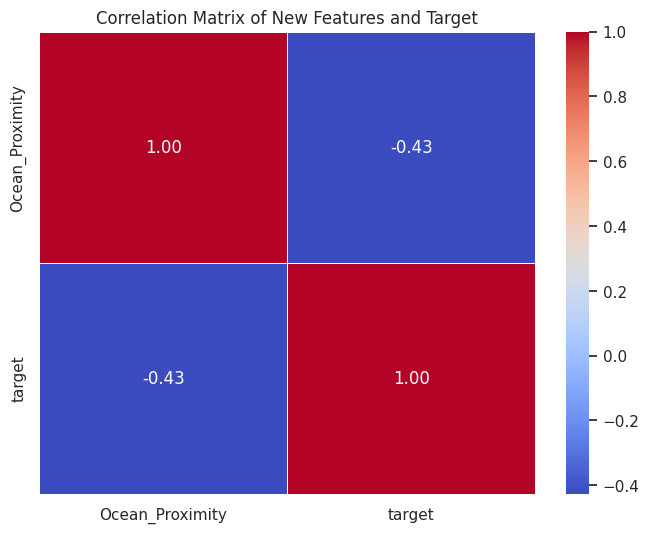

In [354]:
# Select the new features and the target
new_features_and_target = df[['Ocean_Proximity','target']]

df_freq['Ocean_Proximity'] = df['Ocean_Proximity']

# Calculate the correlation matrix
correlation_matrix_new = new_features_and_target.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of New Features and Target')
plt.show()

- The new feature has a very high negative correlation with the target. We see that as the target price increases, the ocean proximity decreases, which allignes with what we observed so far.

### Feature Selection by Feature Scores

- Feature selection using *f_classif* function

In [471]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Separate features (X) and target (y)
X = df_freq.drop('target', axis=1)
y = df_freq['target']

# Initialize SelectKBest with f_classif as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to your data
selector.fit(X, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

print("Feature Relevance to target:")
print(sorted_feature_scores)

Feature Relevance to target:
MedInc                      6.807190
Ocean_Proximity             3.485219
Neighborhood_Cluster        1.939687
Bedrms_per_room             1.906088
Latitude                    1.259511
Population_per_household    1.204033
Population                  1.196320
County                      1.135588
HouseAge                    1.115178
Longitude                   1.056533
City                        1.028386
Rooms_per_person            0.733112
AveRooms                    0.648824
AveBedrms                   0.399970
AveOccup                    0.054542
dtype: float64


- Feature selection using *f_regression* function

In [472]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Separate features (X) and target (y)
X = df_freq.drop('target', axis=1)
y = df_freq['target']

# Initialize SelectKBest with f_classif as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_regression, k='all')

# Fit the selector to your data
selector.fit(X, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

print("Feature Relevance to target:")
print(sorted_feature_scores)

Feature Relevance to target:
MedInc                      18556.571631
Ocean_Proximity              4578.147416
Neighborhood_Cluster         2668.669607
Bedrms_per_room              1442.844400
Rooms_per_person              947.217524
AveRooms                      487.757462
Latitude                      438.005453
HouseAge                      232.841479
County                        144.836153
Population_per_household       89.860554
AveBedrms                      45.108576
Longitude                      43.698976
Population                     12.547410
AveOccup                       11.635342
City                            6.045505
dtype: float64


### Scale numeric features



We will scale the numeric features using StandardScaler.



In [356]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns to scale
numeric_cols = X.columns.drop('Neighborhood_Cluster')

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
scaled_col = scaler.fit_transform(X[numeric_cols])

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(scaled_col, columns=numeric_cols, index=X.index)

# Display the head of the scaled feature DataFrame
display(df_scaled.head())

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  Rooms_per_person  Bedrms_per_room  Population_per_household  \
0  -1.327835          0.659647        -1.145833                 -0.977033   
1  -1.322844          0.854906        -0.987175                  1.669961   
2  -1.332827          0.855758        -1.440115                 -0.843637   
3  -1.337818          0.267179        -0.493194                 -0.733781   
4  -1.337818          0.787681        -0.706259                 -0.629157   

     County      City  Ocean_Proximity  
0 -1.414655 -1.744910        -0.685274  
1 -1.414655 -1.736663        -0.698745  
2 -1.414655 -1.736663        -0.725685  
3  0.719040  0.575896        -0.739156  
4  0.719040  0.575896        -0.739156

Visualize some of the most correlated features with the target, using histograms before and after scaling.
- I decided to plot 'MedInc', 'Ocean_Proximity', 'Bedrms_per_room' and 'Population_per_household'

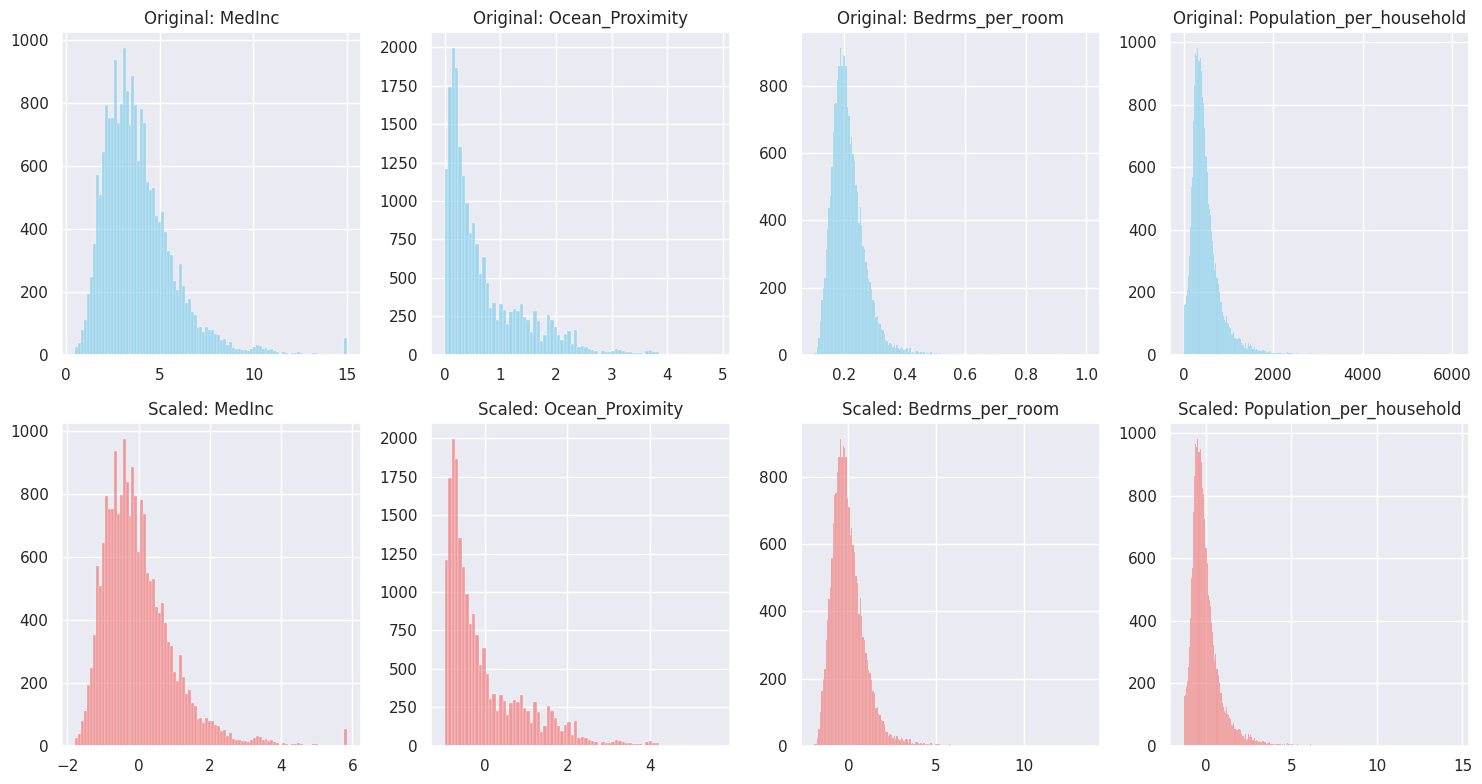

In [357]:
features_to_plot = ['MedInc', 'Ocean_Proximity', 'Bedrms_per_room', 'Population_per_household']

# Define the number of rows and columns for the subplots
n_cols = 4
n_rows = 2 # Before and After scaling

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms for original and scaled data for selected features
for i, col in enumerate(features_to_plot):
    # Original data histogram
    sns.histplot(df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Original: {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Scaled data histogram
    sns.histplot(df_scaled[col], ax=axes[i + n_cols], color='lightcoral')
    axes[i + n_cols].set_title(f'Scaled: {col}')
    axes[i + n_cols].set_xlabel('')
    axes[i + n_cols].set_ylabel('')

plt.tight_layout()
plt.show()

- We see that the features are scaled successfully and that they keep the same distribution

## 3. Modeling & Training
- Train a linear regression model using scikit-learn.
- Optionally, experiment with other regression algorithms (Ridge, Lasso, or Gradient Boosting).

### Split the data into train and test


Divide the scaled data into training (80%) and testing (20%) sets to prepare for model training.



In [358]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 15)
Shape of X_test: (4128, 15)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


### Scale and encode the splitted train and test data

- Separate the numeric and categorical columns and scale and encode the features for train and test data

In [359]:
# Frequency encode City and County
for col in ["City", "County"]:
    freq_map = X_train[col].value_counts().to_dict()
    X_train[col] = X_train[col].map(freq_map).fillna(0)
    X_test[col] = X_test[col].map(freq_map).fillna(0)

# Numeric columns
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()

# categorical column
categorical_feature = 'Neighborhood_Cluster'

# Remove the categorical feature from the numeric features list
numeric_features = [col for col in numeric_features if col != categorical_feature]

In [360]:
# Select the numeric and categorical dataframes
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]
X_train_categorical = X_train[[categorical_feature]]
X_test_categorical = X_test[[categorical_feature]]

In [361]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# One-hot encode the categorical feature
# Use handle_unknown='ignore' for robustness if a new category appears in test
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Use sparse=False to get dense array

# Fit and transform on training data, transform only on test data
X_train_encoded = encoder.fit_transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

# Concatenate the scaled numeric and one-hot encoded arrays
X_train_processed = np.concatenate((X_train_scaled, X_train_encoded), axis=1)
X_test_processed = np.concatenate((X_test_scaled, X_test_encoded), axis=1)

# Get the names of the new one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out([categorical_feature])

# Combine numeric and encoded feature names
all_feature_names = numeric_features + list(encoded_feature_names)

# Convert the processed arrays back to DataFrames
X_train_processed = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=all_feature_names, index=X_test.index)

# Update X_train_scaled and X_test_scaled to the new processed dataframes
X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

In [362]:

print("\nProcessed Training Features:")
display(X_train_scaled.head())
print("\nProcessed Testing Features:")
display(X_test_scaled.head())


Processed Training Features:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
14196 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376   
8267  -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362   
17445  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280   
14265 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507   
2271  -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832   

       Latitude  Longitude  Rooms_per_person  Bedrms_per_room  \
14196 -1.372811   1.272587         -0.552017        -0.211785   
8267  -0.876696   0.709162          0.526956         0.342185   
17445 -0.460146  -0.447603          0.082291        -0.661658   
14265 -1.382172   1.232698         -0.869143         0.783032   
2271   0.532084  -0.108551          0.661600        -0.550364   

       Population_per_household    County      City  Ocean_Proximity  \
14196                  0.322906 -1.381095 -1.726551        -0.807339   
8267                   0.672027  0.717665  0.573304        -0.538976   
17445                 -0.430461  0.717665  0.573304         1.943377   
14265                 -0.380587  0.717665  0.573304        -0.887847   
2271                  -0.314962 -1.423238 -1.744732         1.567670   

       Neighborhood_Cluster_0  Neighborhood_Cluster_1  Neighborhood_Cluster_2  \
14196                     0.0                     0.0                     0.0   
8267                      1.0                     0.0                     0.0   
17445                     0.0                     0.0                     1.0   
14265                     0.0                     0.0                     0.0   
2271                      0.0                     0.0                     1.0   

       Neighborhood_Cluster_3  Neighborhood_Cluster_4  Neighborhood_Cluster_5  
14196                     0.0                     1.0                     0.0  
8267                      0.0                     0.0                     0.0  
17445                     0.0                     0.0                     0.0  
14265                     0.0                     1.0                     0.0  
2271                      0.0                     0.0                     0.0


Processed Testing Features:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
20046 -1.155085 -0.286324 -0.520686  -0.171746   -0.030301  0.067408   
3024  -0.708659  0.110435 -0.165815   0.223472    0.121851 -0.036030   
15663 -0.210402  1.856173 -0.610765   0.205892   -0.102419 -0.149989   
20484  0.975113 -0.921138  0.305115  -0.176552    0.244979  0.030011   
9814  -0.081794  0.427842  0.024193  -0.158465   -0.319653 -0.052971   

       Latitude  Longitude  Rooms_per_person  Bedrms_per_room  \
20046  0.195100   0.285347         -0.798914         0.534470   
3024  -0.235491   0.060975         -0.088890         0.413411   
15663  1.009478  -1.424870          0.837711         1.471098   
20484 -0.637999   0.429943         -0.169784        -0.816270   
9814   0.457199  -1.170581          0.205264        -0.443214   

       Population_per_household    County      City  Ocean_Proximity  \
20046                 -0.370087  0.717665  0.573304         2.171485   
3024                   0.220532 -1.427632 -1.755791         1.245635   
15663                  1.215396  0.717665 -1.735548        -0.914684   
20484                 -0.013091  0.717665  0.573304        -0.284032   
9814                  -0.188964  0.717665  0.573304        -0.928102   

       Neighborhood_Cluster_0  Neighborhood_Cluster_1  Neighborhood_Cluster_2  \
20046                     0.0                     0.0                     1.0   
3024                      0.0                     0.0                     1.0   
15663                     0.0                     1.0                     0.0   
20484                     1.0                     0.0                     0.0   
9814                      0.0                     1.0                     0.0   

       Neighborhood_Cluster_3  Neighborhood_Cluster_4  Neighborhood_Cluster_5  
20046                     0.0                     0.0                     0.0  
3024                      0.0                     0.0                     0.0  
15663                     0.0                     0.0                     0.0  
20484                     0.0                     0.0                     0.0  
9814                      0.0                     0.0                     0.0

#### Train the linear regression model using the whole dataset


Train a linear regression model using the scaled training data and print its intercept and coefficients.



In [363]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model object
model = LinearRegression()

# Fit the linear regression model to the scaled training data
model.fit(X_train_scaled, y_train)

# Print the intercept and coefficients of the trained model
print(f"Intercept (b): {model.intercept_:.2f}")
print("Coefficients (m):")
for feature, coef in zip(X_train_scaled.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")

Intercept (b): 1.92
Coefficients (m):
  MedInc: 0.73
  HouseAge: 0.12
  AveRooms: -0.00
  AveBedrms: -0.24
  Population: -0.25
  AveOccup: 0.01
  Latitude: -0.83
  Longitude: -0.94
  Rooms_per_person: 0.39
  Bedrms_per_room: 0.22
  Population_per_household: 0.29
  County: -0.08
  City: 0.06
  Ocean_Proximity: 0.02
  Neighborhood_Cluster_0: 0.38
  Neighborhood_Cluster_1: 0.00
  Neighborhood_Cluster_2: -0.24
  Neighborhood_Cluster_3: -0.06
  Neighborhood_Cluster_4: 0.22
  Neighborhood_Cluster_5: -0.31


Visualize the actual versus the predicted values

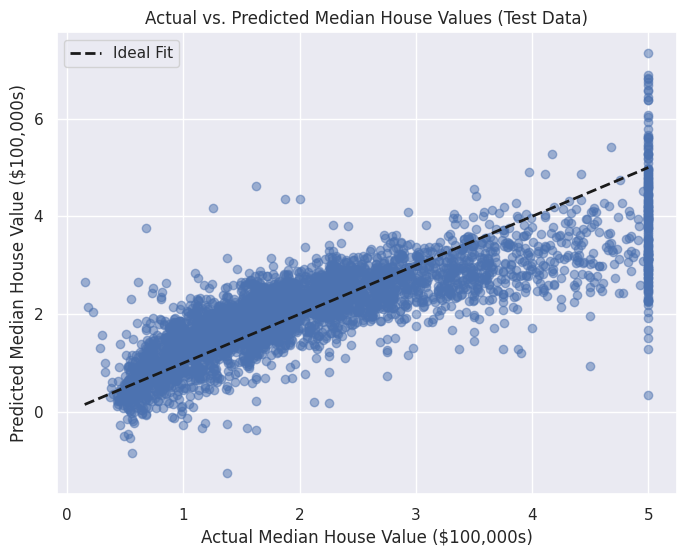

In [364]:
# Generate predictions on the test set
y_pred = model.predict(X_test_scaled)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit') # Add ideal fit line

plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

- From the plot we can see that the point are generally grouped along the ideal fit line, indicating that the model has learned a meaningful relationship between the features and the target.
- Also, there are a lot of points that are not around the line, they are scattered, meaning that there are prediction errors.

##### Evaluation

In [365]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.44
Root Mean Squared Error (RMSE): 0.66
Mean Absolute Error (MAE): 0.48
R-squared (R²): 0.67


 - A MSE of 0.44 means that, on average, the squared difference between the model's predictions and the actual house values is 0.44. This corresponds to an average squared error of 44,000 dollars.
 - An RMSE of 0.66 means that the model's predictions are away from the actual median house values in the test set by about 66,000 dollars.
 - An MAE of 0.48 means that, on average, the model's predictions are off by about 48,000 dollars from the actual median house values
 - An R² of 0.67 means that the model explains approximately 67% of the variability in the median house values in the test set. This suggests that the features and linear model are able to capture a significant portion of the factors influencing house prices, but there is still about 33% of the variability that the model does not explain.

#### Train the linear regression model using 'MedInc' only
- First most correlated feature

Train the model and display its intercept and coefficients

In [366]:
# Select only the 'MedInc' feature from the scaled and encoded training and testing data
X_train_medinc = X_train_scaled[['MedInc']]
X_test_medinc = X_test_scaled[['MedInc']]

# Instantiate a new LinearRegression model
model_medinc= LinearRegression()

# Fit the new model using the selected subset of features
model_medinc.fit(X_train_medinc, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_medinc.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_medinc.columns, model_medinc.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.07
Subset Model Coefficients (m):
  MedInc: 0.80


Visualize the actual versus the predicted values


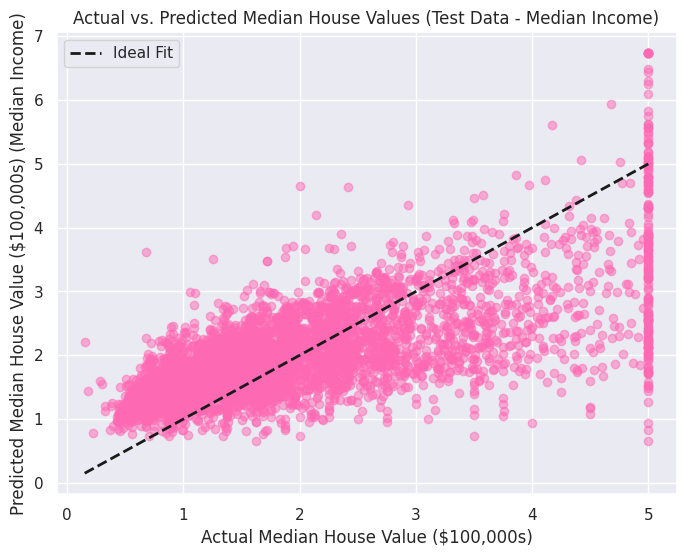

In [367]:
# Make predictions
y_pred_medinc = model_medinc.predict(X_test_medinc)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_medinc, alpha=0.5, color='hotpink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Median Income)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Median Income)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation


In [368]:
# Calculate the evaluation metric
mse_medinc = mean_squared_error(y_test, y_pred_medinc)
rmse_medinc = np.sqrt(mse_medinc)
mae_medinc = mean_absolute_error(y_test, y_pred_medinc)
r2_medinc = r2_score(y_test, y_pred_medinc)

# Print the results
print("\nMedian income Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_medinc:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_medinc:.2f}")
print(f"Mean Absolute Error (MAE): {mae_medinc:.2f}")
print(f"R-squared (R²): {r2_medinc:.2f}")


Median income Model Evaluation:
Mean Squared Error (MSE): 0.71
Root Mean Squared Error (RMSE): 0.84
Mean Absolute Error (MAE): 0.63
R-squared (R²): 0.46


- We see from these metrics that the model's performance is very poor if trained only with 'MedInc' compared to the model trained with the whole dataset

#### Train the linear regression model using 'MedInc' and 'Ocean_Proximity'
- First 2 most correlated features

Train the model and display its intercept and coefficients




In [393]:
# Select only the 'MedInc' feature from the scaled and encoded training and testing data
X_train_medinc = X_train_scaled[['MedInc', 'Ocean_Proximity']]
X_test_medinc = X_test_scaled[['MedInc', 'Ocean_Proximity']]

# Instantiate a new LinearRegression model
model_medinc= LinearRegression()

# Fit the new model using the selected subset of features
model_medinc.fit(X_train_medinc, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_medinc.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_medinc.columns, model_medinc.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.07
Subset Model Coefficients (m):
  MedInc: 0.73
  Ocean_Proximity: -0.34


Visualize the actual versus the predicted values


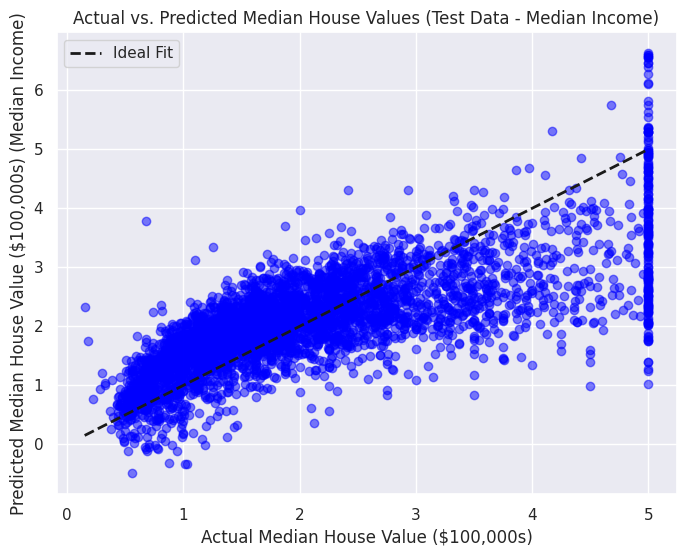

In [397]:
# Make predictions
y_pred_medinc = model_medinc.predict(X_test_medinc)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_medinc, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Median Income)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Median Income)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [398]:
# Calculate the evaluation metric
mse_medinc = mean_squared_error(y_test, y_pred_medinc)
rmse_medinc = np.sqrt(mse_medinc)
mae_medinc = mean_absolute_error(y_test, y_pred_medinc)
r2_medinc = r2_score(y_test, y_pred_medinc)

# Print the results
print("\nMedian income Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_medinc:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_medinc:.2f}")
print(f"Mean Absolute Error (MAE): {mae_medinc:.2f}")
print(f"R-squared (R²): {r2_medinc:.2f}")


Median income Model Evaluation:
Mean Squared Error (MSE): 0.60
Root Mean Squared Error (RMSE): 0.77
Mean Absolute Error (MAE): 0.57
R-squared (R²): 0.54


#### Train the linear regression model using 'MedInc', 'Ocean_Proximity' and 'Location_Clusters'
- First 3 most correlated features

Train the model and display its intercept and coefficients




In [399]:
# Identify the one-hot encoded cluster columns
cluster_columns = [col for col in X_train_scaled.columns if col.startswith('Neighborhood_Cluster_')]

# Define the list of features to use for this model (MedInc + cluster columns)
features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + cluster_columns

# Select only these features from the scaled and encoded training and testing data
X_train_subset = X_train_scaled[features_for_this_model]
X_test_subset = X_test_scaled[features_for_this_model]

# Instantiate a new LinearRegression model
model_subset = LinearRegression()

# Fit the new model using the selected subset of features
model_subset.fit(X_train_subset, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_subset.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_subset.columns, model_subset.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.09
Subset Model Coefficients (m):
  MedInc: 0.71
  Ocean_Proximity: -0.35
  Neighborhood_Cluster_0: -0.03
  Neighborhood_Cluster_1: 0.16
  Neighborhood_Cluster_2: 0.04
  Neighborhood_Cluster_3: -0.21
  Neighborhood_Cluster_4: -0.29
  Neighborhood_Cluster_5: 0.34


Visualize the actual versus the predicted values


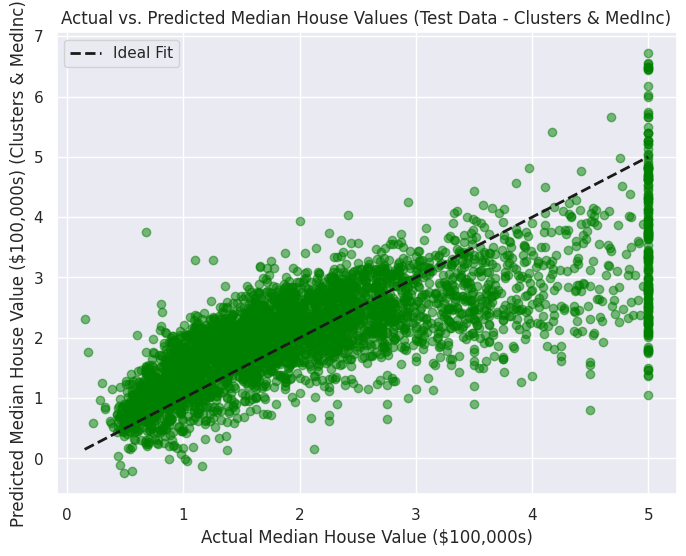

In [400]:
# Make predictions with the cluster-only model
y_pred_clusters_medinc = model_subset.predict(X_test_subset)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_clusters_medinc, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Clusters & MedInc)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Clusters & MedInc)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [401]:
# Calculate the evaluation metric
mse_clusters = mean_squared_error(y_test, y_pred_clusters_medinc)
rmse_clusters = np.sqrt(mse_clusters)
mae_clusters = mean_absolute_error(y_test, y_pred_clusters_medinc)
r2_clusters = r2_score(y_test, y_pred_clusters_medinc)

# Print the results
print("\nLocation Clusters and Median Income Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_clusters:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_clusters:.2f}")
print(f"Mean Absolute Error (MAE): {mae_clusters:.2f}")
print(f"R-squared (R²): {r2_clusters:.2f}")


Location Clusters and Median Income Model Evaluation:
Mean Squared Error (MSE): 0.58
Root Mean Squared Error (RMSE): 0.76
Mean Absolute Error (MAE): 0.55
R-squared (R²): 0.56


- The performance of the model trained with the first 3 most correlated features is better than the performance of the model trained with the first 2 most correlated features only

#### Train the linear regression model using 'MedInc' and 'Location_Clusters'
- 1st and 3rd most correlated features

Train the model and display its intercept and coefficients




In [369]:
# Identify the one-hot encoded cluster columns
cluster_columns = [col for col in X_train_scaled.columns if col.startswith('Neighborhood_Cluster_')]

# Define the list of features to use for this model (MedInc + cluster columns)
features_for_this_model = ['MedInc'] + cluster_columns

# Select only these features from the scaled and encoded training and testing data
X_train_subset = X_train_scaled[features_for_this_model]
X_test_subset = X_test_scaled[features_for_this_model]

# Instantiate a new LinearRegression model
model_subset = LinearRegression()

# Fit the new model using the selected subset of features
model_subset.fit(X_train_subset, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_subset.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_subset.columns, model_subset.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 1.84
Subset Model Coefficients (m):
  MedInc: 0.70
  Neighborhood_Cluster_0: 0.38
  Neighborhood_Cluster_1: 0.57
  Neighborhood_Cluster_2: -0.28
  Neighborhood_Cluster_3: -0.32
  Neighborhood_Cluster_4: 0.05
  Neighborhood_Cluster_5: -0.40


Visualize the actual versus the predicted values


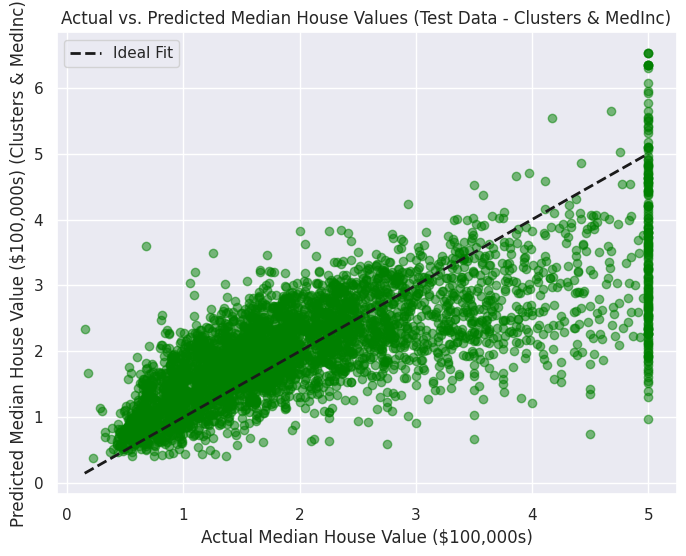

In [370]:
# Make predictions with the cluster-only model
y_pred_clusters_medinc = model_subset.predict(X_test_subset)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_clusters_medinc, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Clusters & MedInc)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Clusters & MedInc)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [371]:
# Calculate the evaluation metric
mse_clusters = mean_squared_error(y_test, y_pred_clusters_medinc)
rmse_clusters = np.sqrt(mse_clusters)
mae_clusters = mean_absolute_error(y_test, y_pred_clusters_medinc)
r2_clusters = r2_score(y_test, y_pred_clusters_medinc)

# Print the results
print("\nLocation Clusters and Median Income Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_clusters:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_clusters:.2f}")
print(f"Mean Absolute Error (MAE): {mae_clusters:.2f}")
print(f"R-squared (R²): {r2_clusters:.2f}")


Location Clusters and Median Income Model Evaluation:
Mean Squared Error (MSE): 0.60
Root Mean Squared Error (RMSE): 0.78
Mean Absolute Error (MAE): 0.56
R-squared (R²): 0.54


- From the metrics we see that this model's performance is poorer than the model trained with the whole dataset, but is better than the performance of the model trained with Median Income only

#### Train the linear regression model using 'Bedrms_per_room' only
- 4th most correlated feature

Train the model and display its intercept and coefficients

In [372]:
# Select only the 'MedInc' feature from the scaled and encoded training and testing data
X_train_bed = X_train_scaled[['Bedrms_per_room']]
X_test_bed = X_test_scaled[['Bedrms_per_room']]

# Instantiate a new LinearRegression model
model_bed = LinearRegression()

# Fit the new model using the selected subset of features
model_bed.fit(X_train_bed, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_bed.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_bed.columns, model_bed.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.07
Subset Model Coefficients (m):
  Bedrms_per_room: -0.30


Visualize the actual versus the predicted values


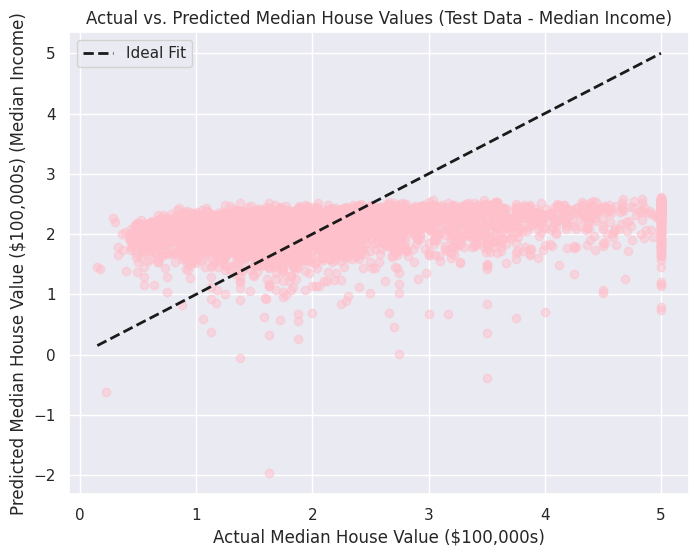

In [373]:
# Make predictions
y_pred_bed = model_bed.predict(X_test_bed)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bed, alpha=0.5, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Median Income)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Median Income)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [374]:
# Calculate the evaluation metric
mse_bed = mean_squared_error(y_test, y_pred_bed)
rmse_bed = np.sqrt(mse_bed)
mae_bed = mean_absolute_error(y_test, y_pred_bed)
r2_bed = r2_score(y_test, y_pred_bed)

# Print the results
print("\nBedrooms per room Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_bed:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_bed:.2f}")
print(f"Mean Absolute Error (MAE): {mae_bed:.2f}")
print(f"R-squared (R²): {r2_bed:.2f}")


Bedrooms per room Model Evaluation:
Mean Squared Error (MSE): 1.23
Root Mean Squared Error (RMSE): 1.11
Mean Absolute Error (MAE): 0.87
R-squared (R²): 0.06


- The model trained only with bedrooms per room has a very very poor accuracy

#### Train the linear regression model using 'MedInc', 'Ocean_Proximity', 'Location_Clusters' and 'Bedrms_per_room'
- First 4 most correlated features

Train the model and display its intercept and coefficients


In [406]:
# Identify the one-hot encoded cluster columns
cluster_columns = [col for col in X_train_scaled.columns if col.startswith('Neighborhood_Cluster_')]

# Define the list of features to use for this model (MedInc + cluster columns)
features_for_this_model = ['MedInc'] + ['Bedrms_per_room'] + ['Ocean_Proximity'] + cluster_columns

# Select only these features from the scaled and encoded training and testing data
X_train_first3 = X_train_scaled[features_for_this_model]
X_test_first3 = X_test_scaled[features_for_this_model]

# Instantiate a new LinearRegression model
model_first3 = LinearRegression()

# Fit the new model using the selected subset of features
model_first3.fit(X_train_first3, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_first3.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_first3.columns, model_first3.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.09
Subset Model Coefficients (m):
  MedInc: 0.84
  Bedrms_per_room: 0.19
  Ocean_Proximity: -0.30
  Neighborhood_Cluster_0: -0.06
  Neighborhood_Cluster_1: 0.17
  Neighborhood_Cluster_2: 0.03
  Neighborhood_Cluster_3: -0.18
  Neighborhood_Cluster_4: -0.27
  Neighborhood_Cluster_5: 0.31


Visualize the actual versus the predicted values



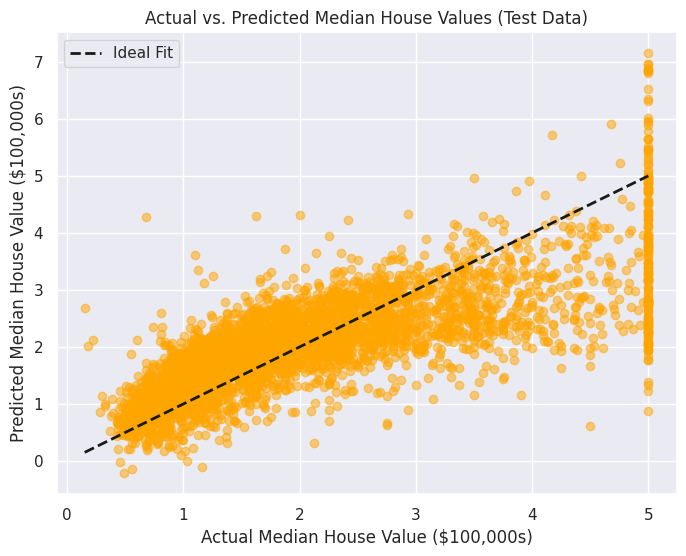

In [407]:
# Make predictions with the cluster-only model
y_pred_first3 = model_first3.predict(X_test_first3)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_first3, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [408]:
# Calculate the evaluation metric
mse_first3 = mean_squared_error(y_test, y_pred_first3)
rmse_first3 = np.sqrt(mse_first3)
mae_first3 = mean_absolute_error(y_test, y_pred_first3)
r2_first3 = r2_score(y_test, y_pred_first3)

# Print the results
print("\nFirst 3 features Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_first3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_first3:.2f}")
print(f"Mean Absolute Error (MAE): {mae_first3:.2f}")
print(f"R-squared (R²): {r2_first3:.2f}")


First 3 features Model Evaluation:
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
Mean Absolute Error (MAE): 0.54
R-squared (R²): 0.57


- The performance of this model is a bit better than the performance of the previous model, trained only with the first 2 most correlated features, but worse thant the model trained with all features

#### Train the linear regression model using 'MedInc', 'Neighborhood_Cluster', 'Bedrms_per_room', 'Ocean_Proximity' and 'Population_per_household'
- First 5 most correlated features

Train the model and display its intercept and coefficients


In [409]:
# Identify the one-hot encoded cluster columns
cluster_columns = [col for col in X_train_scaled.columns if col.startswith('Neighborhood_Cluster_')]

# Define the list of features to use for this model (MedInc + cluster columns)
features_for_this_model = ['MedInc'] + ['Bedrms_per_room'] + ['Ocean_Proximity'] + ['Population_per_household'] + cluster_columns

# Select only these features from the scaled and encoded training and testing data
X_train_first4 = X_train_scaled[features_for_this_model]
X_test_first4 = X_test_scaled[features_for_this_model]

# Instantiate a new LinearRegression model
model_first4 = LinearRegression()

# Fit the new model using the selected subset of features
model_first4.fit(X_train_first4, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_first4.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_first4.columns, model_first4.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.09
Subset Model Coefficients (m):
  MedInc: 0.83
  Bedrms_per_room: 0.18
  Ocean_Proximity: -0.31
  Population_per_household: 0.03
  Neighborhood_Cluster_0: -0.06
  Neighborhood_Cluster_1: 0.16
  Neighborhood_Cluster_2: 0.03
  Neighborhood_Cluster_3: -0.18
  Neighborhood_Cluster_4: -0.27
  Neighborhood_Cluster_5: 0.32


Visualize the actual versus the predicted values



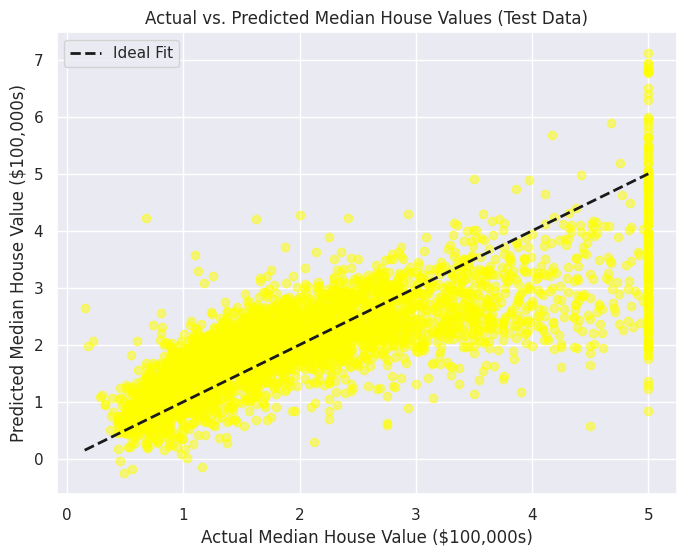

In [410]:
# Make predictions
y_pred_first4 = model_first4.predict(X_test_first4)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_first4, alpha=0.5, color='yellow')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [411]:
# Calculate the evaluation metric
mse_first4 = mean_squared_error(y_test, y_pred_first4)
rmse_first4 = np.sqrt(mse_first4)
mae_first4 = mean_absolute_error(y_test, y_pred_first4)
r2_first4 = r2_score(y_test, y_pred_first4)

# Print the results
print("\nFirst 4 features Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_first4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_first4:.2f}")
print(f"Mean Absolute Error (MAE): {mae_first4:.2f}")
print(f"R-squared (R²): {r2_first4:.2f}")


First 4 features Model Evaluation:
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
Mean Absolute Error (MAE): 0.54
R-squared (R²): 0.57


#### Train the linear regression model 'MedInc', 'Bedrms_per_room', 'Ocean_Proximity', 'Population_per_household', 'County' and 'HouseAge'
- First 6 most correlated features excluding the redundant features (Latitude, Population and Neighborhood Clusters)

Train the model and display its intercept and coefficients


In [436]:
# Define the list of features to use for this model
features_for_this_model = ['MedInc'] + ['Bedrms_per_room'] + ['Ocean_Proximity'] + ['Population_per_household'] + ['County'] + ['HouseAge']

# Select only these features from the scaled and encoded training and testing data
X_train_first4 = X_train_scaled[features_for_this_model]
X_test_first4 = X_test_scaled[features_for_this_model]

# Instantiate a new LinearRegression model
model_first4 = LinearRegression()

# Fit the new model using the selected subset of features
model_first4.fit(X_train_first4, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_first4.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_first4.columns, model_first4.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.07
Subset Model Coefficients (m):
  MedInc: 0.89
  Bedrms_per_room: 0.20
  Ocean_Proximity: -0.23
  Population_per_household: 0.08
  County: -0.03
  HouseAge: 0.17


Visualize the actual versus the predicted values


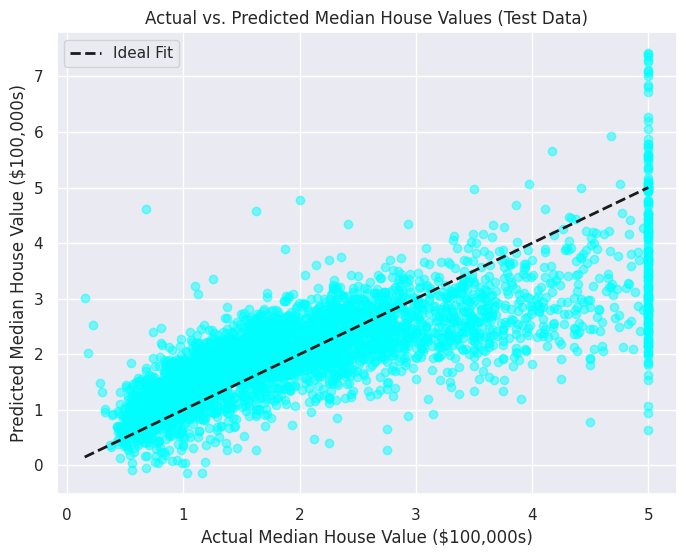

In [439]:
# Make predictions
y_pred_first4 = model_first4.predict(X_test_first4)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_first4, alpha=0.5, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [441]:
# Calculate the evaluation metric
mse_first4 = mean_squared_error(y_test, y_pred_first4)
rmse_first4 = np.sqrt(mse_first4)
mae_first4 = mean_absolute_error(y_test, y_pred_first4)
r2_first4 = r2_score(y_test, y_pred_first4)

# Print the results
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse_first4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_first4:.2f}")
print(f"Mean Absolute Error (MAE): {mae_first4:.2f}")
print(f"R-squared (R²): {r2_first4:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 0.56
Root Mean Squared Error (RMSE): 0.75
Mean Absolute Error (MAE): 0.55
R-squared (R²): 0.57


#### Train the linear regression model using 'MedInc', 'Bedrms_per_room' and 'Population_per_household'
- First most correlated feature and the most correlated house related features


Train the model and display its intercept and coefficients




In [381]:
# Select only the needed features from the scaled and encoded training and testing data
X_train_pop = X_train_scaled[['MedInc', 'Bedrms_per_room', 'Population_per_household']]
X_test_pop = X_test_scaled[['MedInc', 'Bedrms_per_room', 'Population_per_household']]

# Instantiate a new LinearRegression model
model_pop= LinearRegression()

# Fit the new model using the selected subset of features
model_pop.fit(X_train_pop, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_pop.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_pop.columns, model_pop.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 2.07
Subset Model Coefficients (m):
  MedInc: 0.99
  Bedrms_per_room: 0.31
  Population_per_household: 0.04


Visualize the actual versus the predicted values


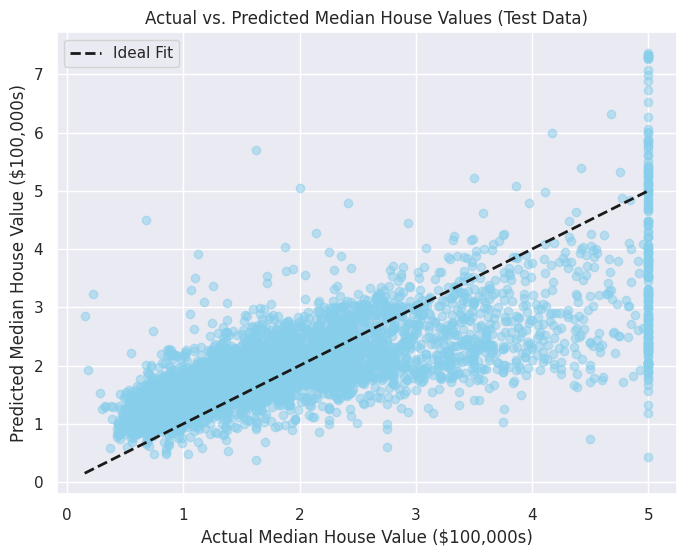

In [382]:
# Make predictions with the cluster-only model
y_pred_pop = model_pop.predict(X_test_pop)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_pop, alpha=0.5, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [383]:
# Calculate the evaluation metric
mse_pop = mean_squared_error(y_test, y_pred_pop)
rmse_pop = np.sqrt(mse_pop)
mae_pop = mean_absolute_error(y_test, y_pred_pop)
r2_pop = r2_score(y_test, y_pred_pop)

# Print the results
print("\n Median Income, Bedrooms per room and Population per household Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_pop:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_pop:.2f}")
print(f"Mean Absolute Error (MAE): {mae_pop:.2f}")
print(f"R-squared (R²): {r2_pop:.2f}")


 Median Income, Bedrooms per room and Population per household Model Evaluation:
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.81
Mean Absolute Error (MAE): 0.59
R-squared (R²): 0.50


- We observe from these metrics that this model gives a very poor performance, so training without location clusters makes the predictions less accurate

#### Train the linear regression model by location: 'Latitude', 'Longitude', 'Location_Cluster', 'Ocean_Proxmity', 'City', 'County'
- All features based on location

See the trained model with each location feature separately

##### Train the linear regression model using only 'Latitude'

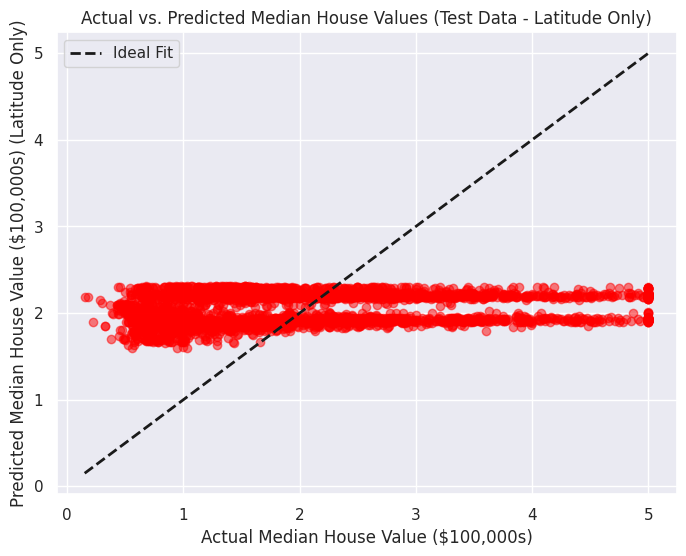


Latitude Only Model Evaluation:
Mean Squared Error (MSE): 1.28
Root Mean Squared Error (RMSE): 1.13
Mean Absolute Error (MAE): 0.90
R-squared (R²): 0.02


In [384]:
# Select only the 'Latitude' feature
X_train_lat = X_train_scaled[['Latitude']]
X_test_lat = X_test_scaled[['Latitude']]

# Instantiate and train the LinearRegression model
model_lat = LinearRegression()
model_lat.fit(X_train_lat, y_train)

# Make predictions
y_pred_lat = model_lat.predict(X_test_lat)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lat, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Latitude Only)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Latitude Only)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
mse_lat = mean_squared_error(y_test, y_pred_lat)
rmse_lat = np.sqrt(mse_lat)
mae_lat = mean_absolute_error(y_test, y_pred_lat)
r2_lat = r2_score(y_test, y_pred_lat)

print("\nLatitude Only Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lat:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lat:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lat:.2f}")
print(f"R-squared (R²): {r2_lat:.2f}")

##### Train the linear regression model using only 'Longitude'

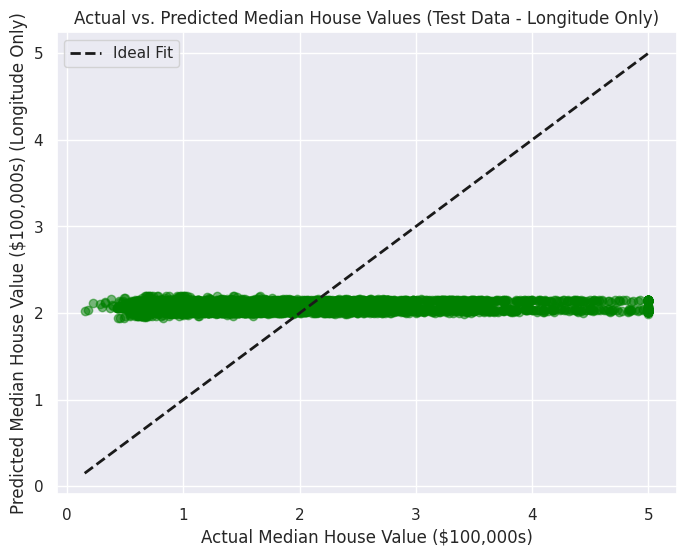


Longitude Only Model Evaluation:
Mean Squared Error (MSE): 1.31
Root Mean Squared Error (RMSE): 1.14
Mean Absolute Error (MAE): 0.90
R-squared (R²): 0.00


In [385]:
# Select only the 'Longitude' feature
X_train_lon = X_train_scaled[['Longitude']]
X_test_lon = X_test_scaled[['Longitude']]

# Instantiate and train the LinearRegression model
model_lon = LinearRegression()
model_lon.fit(X_train_lon, y_train)

# Make predictions
y_pred_lon = model_lon.predict(X_test_lon)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lon, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Longitude Only)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Longitude Only)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
mse_lon = mean_squared_error(y_test, y_pred_lon)
rmse_lon = np.sqrt(mse_lon)
mae_lon = mean_absolute_error(y_test, y_pred_lon)
r2_lon = r2_score(y_test, y_pred_lon)

print("\nLongitude Only Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lon:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lon:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lon:.2f}")
print(f"R-squared (R²): {r2_lon:.2f}")

##### Train the linear regression model using only 'Location_Clusters'
- 3rd most correlated feature

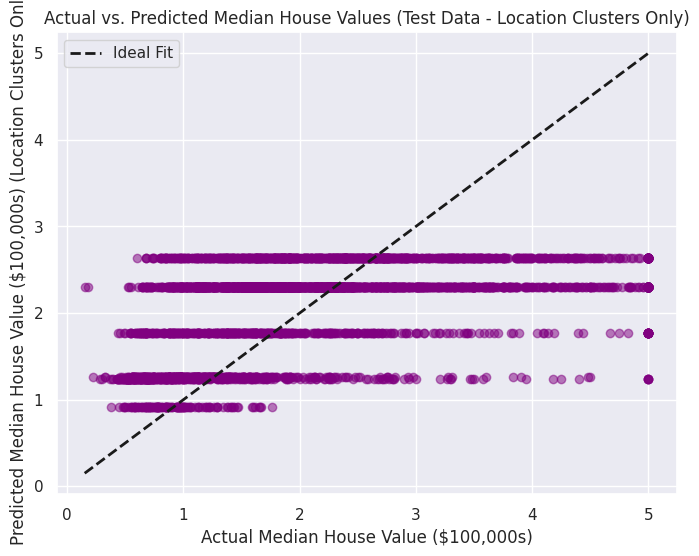


Location Clusters Only Model Evaluation:
Mean Squared Error (MSE): 1.02
Root Mean Squared Error (RMSE): 1.01
Mean Absolute Error (MAE): 0.77
R-squared (R²): 0.22


In [386]:
# Select only the one-hot encoded cluster columns
cluster_columns = [col for col in X_train_scaled.columns if col.startswith('Neighborhood_Cluster_')]
X_train_clusters_only = X_train_scaled[cluster_columns]
X_test_clusters_only = X_test_scaled[cluster_columns]

# Instantiate and train the LinearRegression model
model_clusters_only = LinearRegression()
model_clusters_only.fit(X_train_clusters_only, y_train)

# Make predictions
y_pred_clusters_only = model_clusters_only.predict(X_test_clusters_only)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_clusters_only, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Location Clusters Only)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Location Clusters Only)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
mse_clusters_only = mean_squared_error(y_test, y_pred_clusters_only)
rmse_clusters_only = np.sqrt(mse_clusters_only)
mae_clusters_only = mean_absolute_error(y_test, y_pred_clusters_only)
r2_clusters_only = r2_score(y_test, y_pred_clusters_only)

print("\nLocation Clusters Only Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_clusters_only:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_clusters_only:.2f}")
print(f"Mean Absolute Error (MAE): {mae_clusters_only:.2f}")
print(f"R-squared (R²): {r2_clusters_only:.2f}")

##### Train the linear regression model using only 'Ocean_Proximity'
- 2nd most correlated feature

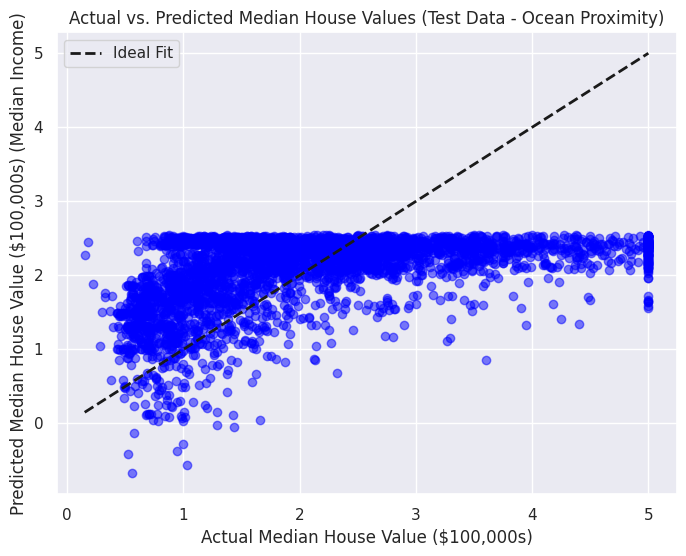


Ocean Proximity Model Evaluation:
Mean Squared Error (MSE): 1.07
Root Mean Squared Error (RMSE): 1.03
Mean Absolute Error (MAE): 0.81
R-squared (R²): 0.19


In [418]:
# Select only the 'Ocean_Proximity' feature from the scaled and encoded training and testing data
X_train_medinc = X_train_scaled[['Ocean_Proximity']]
X_test_medinc = X_test_scaled[['Ocean_Proximity']]

# Instantiate a new LinearRegression model
model_medinc= LinearRegression()

# Fit the new model using the selected subset of features
model_medinc.fit(X_train_medinc, y_train)

# Make predictions
y_pred_medinc = model_medinc.predict(X_test_medinc)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_medinc, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data - Ocean Proximity)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the evaluation metric
mse_medinc = mean_squared_error(y_test, y_pred_medinc)
rmse_medinc = np.sqrt(mse_medinc)
mae_medinc = mean_absolute_error(y_test, y_pred_medinc)
r2_medinc = r2_score(y_test, y_pred_medinc)

# Print the results
print("\nOcean Proximity Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_medinc:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_medinc:.2f}")
print(f"Mean Absolute Error (MAE): {mae_medinc:.2f}")
print(f"R-squared (R²): {r2_medinc:.2f}")

##### Train the linear regression model using only 'County'

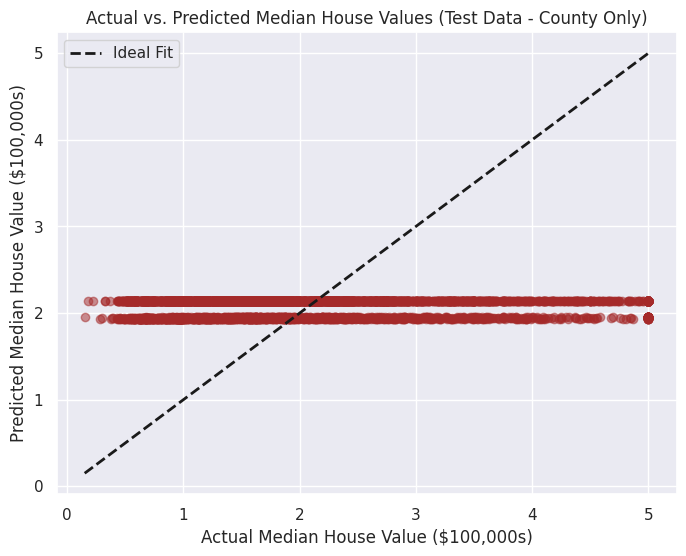


Latitude Only Model Evaluation:
Mean Squared Error (MSE): 1.30
Root Mean Squared Error (RMSE): 1.14
Mean Absolute Error (MAE): 0.90
R-squared (R²): 0.01


In [433]:
# Select only the 'County' feature
X_train_lat = X_train_scaled[['County']]
X_test_lat = X_test_scaled[['County']]

# Instantiate and train the LinearRegression model
model_lat = LinearRegression()
model_lat.fit(X_train_lat, y_train)

# Make predictions
y_pred_lat = model_lat.predict(X_test_lat)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lat, alpha=0.5, color='brown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data - County Only)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
mse_county = mean_squared_error(y_test, y_pred_lat)
rmse_county = np.sqrt(mse_county)
mae_county = mean_absolute_error(y_test, y_pred_lat)
r2_county = r2_score(y_test, y_pred_lat)

print("\nLatitude Only Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_county:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_county:.2f}")
print(f"Mean Absolute Error (MAE): {mae_county:.2f}")
print(f"R-squared (R²): {r2_county:.2f}")

Train the linear regression model using only 'City'

<>:29: SyntaxWarning: invalid escape sequence '\C'
<>:29: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-1196160933.py:29: SyntaxWarning: invalid escape sequence '\C'
  print("\City Only Model Evaluation:")


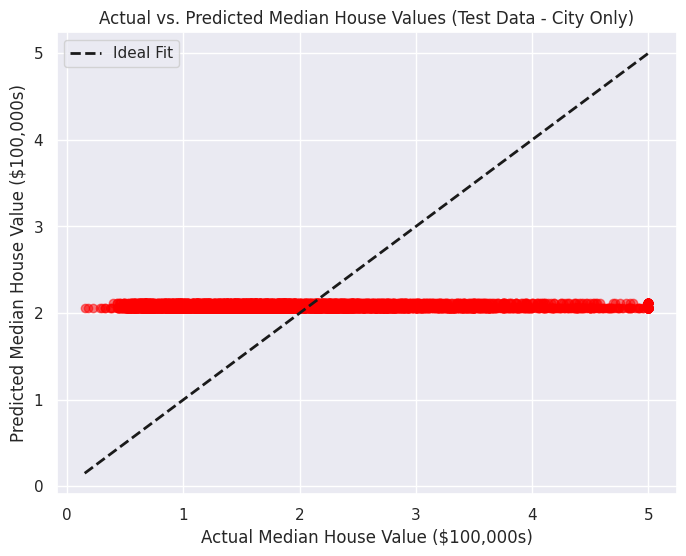

\City Only Model Evaluation:
Mean Squared Error (MSE): 1.31
Root Mean Squared Error (RMSE): 1.14
Mean Absolute Error (MAE): 0.91
R-squared (R²): -0.00


In [434]:
# Select only the 'City' feature
X_train_lat = X_train_scaled[['City']]
X_test_lat = X_test_scaled[['City']]

# Instantiate and train the LinearRegression model
model_lat = LinearRegression()
model_lat.fit(X_train_lat, y_train)

# Make predictions
y_pred_lat = model_lat.predict(X_test_lat)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lat, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Actual vs. Predicted Median House Values (Test Data - City Only)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
mse_city = mean_squared_error(y_test, y_pred_lat)
rmse_city = np.sqrt(mse_city)
mae_city = mean_absolute_error(y_test, y_pred_lat)
r2_city = r2_score(y_test, y_pred_lat)

print("\City Only Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_city:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_city:.2f}")
print(f"Mean Absolute Error (MAE): {mae_city:.2f}")
print(f"R-squared (R²): {r2_city:.2f}")

##### Evaluation of metrics

In [435]:
# Create a dictionary to store the metrics for each model
location_model_metrics = {
    'Model': ['Latitude Only', 'Longitude Only', 'Location Clusters Only', 'Ocean Proximity Only', 'County Only', 'City Only'],
    'MSE': [mse_lat, mse_lon, mse_clusters_only, mse_medinc, mse_county, mse_city],
    'RMSE': [rmse_lat, rmse_lon, rmse_clusters_only, rmse_medinc, rmse_county, rmse_city],
    'MAE': [mae_lat, mae_lon, mae_clusters_only, mae_medinc, mae_county, mae_city],
    'R²': [r2_lat, r2_lon, r2_clusters_only, r2_medinc, r2_county, r2_city]
}

# Create a pandas DataFrame from the dictionary
location_metrics_df = pd.DataFrame(location_model_metrics)

# Display the DataFrame
display(location_metrics_df)

Model       MSE      RMSE       MAE        R²
0           Latitude Only  1.281690  1.132118  0.896409  0.021916
1          Longitude Only  1.308106  1.143725  0.902666  0.001758
2  Location Clusters Only  1.024980  1.012413  0.769604  0.217817
3    Ocean Proximity Only  1.065824  1.032387  0.810779  0.186648
4             County Only  1.300012  1.140181  0.901127  0.007934
5               City Only  1.310910  1.144950  0.906022 -0.000382

- It seems that the clusters have the best performance if the model is trained solely with one location feature

##### Train the model using all 6 location features

Train the model and display its intercept and coefficients

In [430]:
# Identify the one-hot encoded cluster columns
cluster_columns = [col for col in X_train_scaled.columns if col.startswith('Neighborhood_Cluster_')]

# Define the list of features to use for this model (MedInc + cluster columns)
features_for_this_model = ['Latitude'] + ['Longitude'] + ['Ocean_Proximity'] + ['City'] + ['County'] + cluster_columns

# Select only these features from the scaled and encoded training and testing data
X_train_loc = X_train_scaled[features_for_this_model]
X_test_loc = X_test_scaled[features_for_this_model]

# Instantiate a new LinearRegression model
model_loc = LinearRegression()

# Fit the new model using the selected subset of features
model_loc.fit(X_train_loc, y_train)

# Print the intercept and coefficients for this subset model
print(f"Subset Model Intercept (b): {model_loc.intercept_:.2f}")
print("Subset Model Coefficients (m):")
for feature, coef in zip(X_train_loc.columns, model_subset.coef_):
    print(f"  {feature}: {coef:.2f}")

Subset Model Intercept (b): 1.73
Subset Model Coefficients (m):
  Latitude: 0.71
  Longitude: -0.35
  Ocean_Proximity: -0.03
  City: 0.16
  County: 0.04
  Neighborhood_Cluster_0: -0.21
  Neighborhood_Cluster_1: -0.29
  Neighborhood_Cluster_2: 0.34


Visualize the actual versus the predicted values


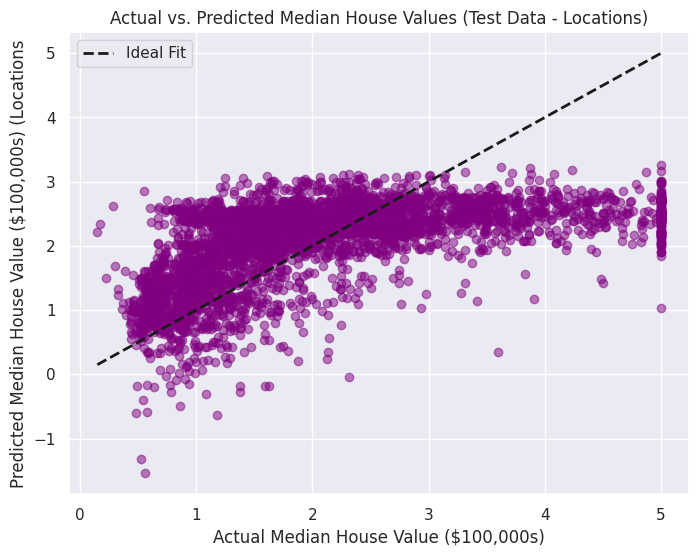

In [428]:
# Make predictions with the cluster-only model
y_pred_loc = model_loc.predict(X_test_loc)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_loc, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) (Locations")
plt.title("Actual vs. Predicted Median House Values (Test Data - Locations)")
plt.legend()
plt.grid(True)
plt.show()

##### Evaluation

In [429]:
# Calculate the evaluation metric
mse_loc = mean_squared_error(y_test, y_pred_loc)
rmse_loc = np.sqrt(mse_loc)
mae_loc = mean_absolute_error(y_test, y_pred_loc)
r2_loc = r2_score(y_test, y_pred_loc)

# Print the results
print("\nLocation Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_loc:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_loc:.2f}")
print(f"Mean Absolute Error (MAE): {mae_loc:.2f}")
print(f"R-squared (R²): {r2_loc:.2f}")


Location Model Evaluation:
Mean Squared Error (MSE): 0.92
Root Mean Squared Error (RMSE): 0.96
Mean Absolute Error (MAE): 0.73
R-squared (R²): 0.30


- The model trained only by locations has a poor performance, even if the clusters and ocean proximity centered more points around the Ideal Fit line

### Test training the linear regression model with more combinations

We try aiming for the smallest errors and the bigged R2 value

- Columns combinations & their evaluations for comparison

In [496]:
# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['City'] + ['County'] + cluster_columns

# Mean Squared Error (MSE): 0.58
# Root Mean Squared Error (RMSE): 0.76
# Mean Absolute Error (MAE): 0.55
# R-squared (R²): 0.56

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['City'] + ['County'] + cluster_columns

# Mean Squared Error (MSE): 0.56
# Root Mean Squared Error (RMSE): 0.75
# Mean Absolute Error (MAE): 0.54
# R-squared (R²): 0.57

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + cluster_columns

# Mean Squared Error (MSE): 0.56
# Root Mean Squared Error (RMSE): 0.75
# Mean Absolute Error (MAE): 0.54
# R-squared (R²): 0.57

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + cluster_columns + ['HouseAge']

# Location Model Evaluation:
# Mean Squared Error (MSE): 0.55
# Root Mean Squared Error (RMSE): 0.74
# Mean Absolute Error (MAE): 0.54
# R-squared (R²): 0.58

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + ['HouseAge']

# Mean Squared Error (MSE): 0.56
# Root Mean Squared Error (RMSE): 0.75
# Mean Absolute Error (MAE): 0.55
# R-squared (R²): 0.57

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + ['HouseAge'] + ['Rooms_per_person']

# Mean Squared Error (MSE): 0.55
# Root Mean Squared Error (RMSE): 0.74
# Mean Absolute Error (MAE): 0.53
# R-squared (R²): 0.58

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + cluster_columns

# Mean Squared Error (MSE): 0.53
# Root Mean Squared Error (RMSE): 0.73
# Mean Absolute Error (MAE): 0.52
# R-squared (R²): 0.60

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveOccup']

# Mean Squared Error (MSE): 0.55
# Root Mean Squared Error (RMSE): 0.74
# Mean Absolute Error (MAE): 0.53
# R-squared (R²): 0.58

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveOccup'] + cluster_columns

# Mean Squared Error (MSE): 0.53
# Root Mean Squared Error (RMSE): 0.73
# Mean Absolute Error (MAE): 0.52
# R-squared (R²): 0.60

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + cluster_columns

# Mean Squared Error (MSE): 0.48
# Root Mean Squared Error (RMSE): 0.69
# Mean Absolute Error (MAE): 0.50
# R-squared (R²): 0.64

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns

# Mean Squared Error (MSE): 0.47
# Root Mean Squared Error (RMSE): 0.69
# Mean Absolute Error (MAE): 0.49
# R-squared (R²): 0.64

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms']

# Mean Squared Error (MSE): 0.49
# Root Mean Squared Error (RMSE): 0.70
# Mean Absolute Error (MAE): 0.51
# R-squared (R²): 0.63

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns + ['Latitude'] + ['Longitude']

# Mean Squared Error (MSE): 0.44
# Root Mean Squared Error (RMSE): 0.66
# Mean Absolute Error (MAE): 0.48
# R-squared (R²): 0.66

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns + ['Latitude']

# Mean Squared Error (MSE): 0.46
# Root Mean Squared Error (RMSE): 0.68
# Mean Absolute Error (MAE): 0.49
# R-squared (R²): 0.65

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns + ['Latitude']

# Mean Squared Error (MSE): 0.46
# Root Mean Squared Error (RMSE): 0.68
# Mean Absolute Error (MAE): 0.49
# R-squared (R²): 0.65

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns + ['AveOccup']

# Mean Squared Error (MSE): 0.47
# Root Mean Squared Error (RMSE): 0.69
# Mean Absolute Error (MAE): 0.49
# R-squared (R²): 0.64

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['Population'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns + ['AveOccup']

# Mean Squared Error (MSE): 0.47
# Root Mean Squared Error (RMSE): 0.69
# Mean Absolute Error (MAE): 0.50
# R-squared (R²): 0.64

# features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['City'] + ['Population'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns + ['AveOccup'] + ['Latitude'] + ['Longitude']

# Mean Squared Error (MSE): 0.44
# Root Mean Squared Error (RMSE): 0.66
# Mean Absolute Error (MAE): 0.48
# R-squared (R²): 0.67

features_for_this_model = ['MedInc'] + ['Ocean_Proximity'] + ['Bedrms_per_room'] + ['Population_per_household'] + ['Population'] + ['County'] + ['HouseAge'] + ['Rooms_per_person'] + ['AveRooms'] + ['AveBedrms'] + cluster_columns + ['AveOccup'] + ['Latitude'] + ['Longitude']

# Mean Squared Error (MSE): 0.44
# Root Mean Squared Error (RMSE): 0.66
# Mean Absolute Error (MAE): 0.48
# R-squared (R²): 0.67

- Training and evaluationg the model

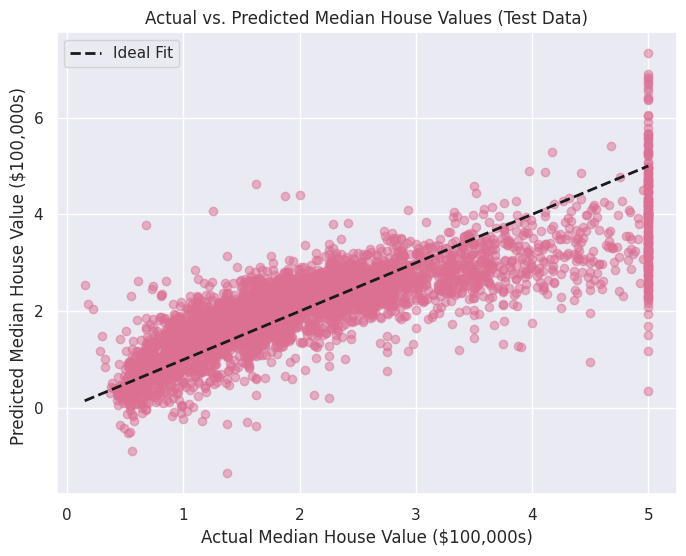


Location Model Evaluation:
Mean Squared Error (MSE): 0.44
Root Mean Squared Error (RMSE): 0.66
Mean Absolute Error (MAE): 0.48
R-squared (R²): 0.67


In [497]:
# Select only these features from the scaled and encoded training and testing data
X_train_loc = X_train_scaled[features_for_this_model]
X_test_loc = X_test_scaled[features_for_this_model]

# Instantiate a new LinearRegression model
model_loc = LinearRegression()

# Fit the new model using the selected subset of features
model_loc.fit(X_train_loc, y_train)

# Make predictions with the cluster-only model
y_pred_loc = model_loc.predict(X_test_loc)

# Visualize the predicted vs actual for this model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_loc, alpha=0.5, color='palevioletred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s) ")
plt.title("Actual vs. Predicted Median House Values (Test Data)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate the evaluation metric
mse_loc = mean_squared_error(y_test, y_pred_loc)
rmse_loc = np.sqrt(mse_loc)
mae_loc = mean_absolute_error(y_test, y_pred_loc)
r2_loc = r2_score(y_test, y_pred_loc)

# Print the results
print("\nLocation Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_loc:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_loc:.2f}")
print(f"Mean Absolute Error (MAE): {mae_loc:.2f}")
print(f"R-squared (R²): {r2_loc:.2f}")